Importar librerías.

In [1]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

La función tabla recibe un url de nba.com y lo transforma en un DataFrame manejable.

In [2]:
headers = {
    'User-Agent': 'Mozilla/5.0',
    'Referer': 'https://stats.nba.com/players/drives/',
    'x-nba-stats-origin': 'stats',
    'x-nba-stats-token': 'true',
}

def tabla(url):
    r = requests.get(url, headers=headers)
    data = r.json()
    df = pd.DataFrame(data=data['resultSets'][0]['rowSet'], columns=data['resultSets'][0]['headers'])
    return df

Un ejemplo. Se pasa el link con todos los tiros de LeBron James.

In [3]:
ejemplo_tabla = tabla("https://stats.nba.com/stats/shotchartdetail?AheadBehind=&CFID=&CFPARAMS=&ClutchTime=&Conference=&ContextFilter=&ContextMeasure=FGA&DateFrom=&DateTo=&Division=&EndPeriod=10&EndRange=28800&GROUP_ID=&GameEventID=&GameID=&GameSegment=&GroupID=&GroupMode=&GroupQuantity=5&LastNGames=0&LeagueID=00&Location=&Month=0&OnOff=&OpponentTeamID=0&Outcome=&PORound=0&Period=0&PlayerID=2544&PlayerID1=&PlayerID2=&PlayerID3=&PlayerID4=&PlayerID5=&PlayerPosition=&PointDiff=&Position=&RangeType=0&RookieYear=&Season=&SeasonSegment=&SeasonType=Regular Season&ShotClockRange=&StartPeriod=1&StartRange=0&StarterBench=&TeamID=0&VsConference=&VsDivision=&VsPlayerID1=&VsPlayerID2=&VsPlayerID3=&VsPlayerID4=&VsPlayerID5=&VsTeamID=")
ejemplo_tabla

GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID   PLAYER_NAME  \
0      Shot Chart Detail  0020300014             20       2544  LeBron James   
1      Shot Chart Detail  0020300014             28       2544  LeBron James   
2      Shot Chart Detail  0020300014             35       2544  LeBron James   
3      Shot Chart Detail  0020300014             39       2544  LeBron James   
4      Shot Chart Detail  0020300014             54       2544  LeBron James   
...                  ...         ...            ...        ...           ...   
25041  Shot Chart Detail  0022000212            518       2544  LeBron James   
25042  Shot Chart Detail  0022000212            523       2544  LeBron James   
25043  Shot Chart Detail  0022000212            597       2544  LeBron James   
25044  Shot Chart Detail  0022000212            652       2544  LeBron James   
25045  Shot Chart Detail  0022000212            682       2544  LeBron James   

          TEAM_ID            TEAM_NAME  PERIOD  MINUTES_REMAINING  \
0      1610612739  Cleveland Cavaliers       1                  8   
1      1610612739  Cleveland Cavaliers       1                  7   
2      1610612739  Cleveland Cavaliers       1                  7   
3      1610612739  Cleveland Cavaliers       1                  6   
4      1610612739  Cleveland Cavaliers       1                  4   
...           ...                  ...     ...                ...   
25041  1610612747   Los Angeles Lakers       4                 11   
25042  1610612747   Los Angeles Lakers       4                 10   
25043  1610612747   Los Angeles Lakers       4                  4   
25044  1610612747   Los Angeles Lakers       4                  1   
25045  1610612747   Los Angeles Lakers       4                  0   

       SECONDS_REMAINING  ...         SHOT_ZONE_AREA  SHOT_ZONE_RANGE  \
0                     56  ...          Right Side(R)         8-16 ft.   
1                     44  ...           Left Side(L)         8-16 ft.   
2                      1  ...          Right Side(R)        16-24 ft.   
3                     29  ...           Left Side(L)         8-16 ft.   
4                     48  ...              Center(C)  Less Than 8 ft.   
...                  ...  ...                    ...              ...   
25041                 12  ...  Right Side Center(RC)          24+ ft.   
25042                 33  ...  Right Side Center(RC)        16-24 ft.   
25043                 42  ...   Left Side Center(LC)          24+ ft.   
25044                 27  ...   Left Side Center(LC)          24+ ft.   
25045                  0  ...              Center(C)          24+ ft.   

      SHOT_DISTANCE LOC_X LOC_Y SHOT_ATTEMPTED_FLAG  SHOT_MADE_FLAG  \
0                15   158     0                   1               1   
1                13  -131     2                   1               1   
2                16   163     5                   1               1   
3                14  -118    92                   1               0   
4                 5    54    22                   1               1   
...             ...   ...   ...                 ...             ...   
25041            26   208   158                   1               1   
25042            19    96   166                   1               0   
25043            26  -136   232                   1               0   
25044            25  -106   230                   1               0   
25045            28   -82   268                   1               0   

       GAME_DATE  HTM  VTM  
0       20031029  SAC  CLE  
1       20031029  SAC  CLE  
2       20031029  SAC  CLE  
3       20031029  SAC  CLE  
4       20031029  SAC  CLE  
...          ...  ...  ...  
25041   20210118  LAL  GSW  
25042   20210118  LAL  GSW  
25043   20210118  LAL  GSW  
25044   20210118  LAL  GSW  
25045   20210118  LAL  GSW  

[25046 rows x 24 columns]

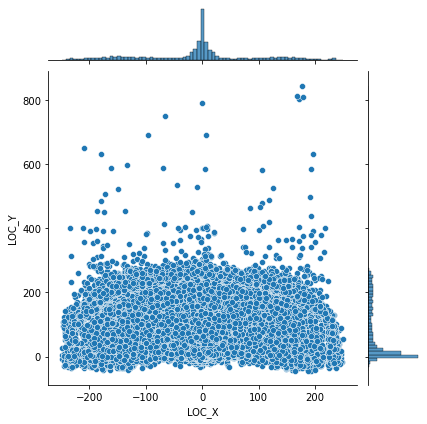

In [4]:
#Mostrar gráfico de tiros
shot_chart = sns.jointplot(data=ejemplo_tabla, x=ejemplo_tabla["LOC_X"], y=ejemplo_tabla["LOC_Y"])

In [5]:
#Dibujamos la media cancha
from matplotlib.patches import Circle, Rectangle, Arc

def media_cancha(ax=None, color='black', lw=2, outer_lines=False):
    #if an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

  #create the various parts of an NBA basketball court

  #create the basketball hoop
  #diameter of a hoop is 18" so it has a radius of 9", which is a value of 7.5 in our coordinate system
    hoop = Circle((0,0), radius = 7.5, linewidth=lw, color=color, fill=False)

  #create backboard
    backboard = Rectangle((-30, -7), 60, -1, linewidth=lw, color=color)

  #the paint
  #create the outer box of the paint, width=16 ft, height=19 ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)

  #create the inner box of the paint, width=12 ft, hieght=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)

  #create the free throw top arc
    top_free_throw=Arc((0, 152.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color, fill=False)

  #create the free throw bottom arc
    bottom_free_throw=Arc((0, 152.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color, linestyle='dashed')

  #restricted zone, arc with 4 ft radius from center of the hoop
    restricted=Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw, color=color)

  #three point line
  #create the side 3 point lines, 14 ft long before they before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)

    corner_three_b = Rectangle((220, -47.5), 0, 140,  linewidth=lw, color=color)

  #three point arc, center of the arc will be the hoop, arc is 23 ft 9 inches away from the hoop
    three_arc = Arc((0, 0), 475, 490, theta1=22.75, theta2=157.25, linewidth=lw, color=color)

  #center court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color)

    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0, linewidth=lw, color=color)

  #list of court elements to be poltted onto the axes
    court_elements=[hoop, backboard, outer_box, inner_box, top_free_throw, bottom_free_throw,
                 restricted, corner_three_a, corner_three_b, three_arc, center_outer_arc, center_inner_arc]

    if outer_lines:
      #draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw, color=color, fill=False)
        court_elements.append(outer_lines)

  #add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

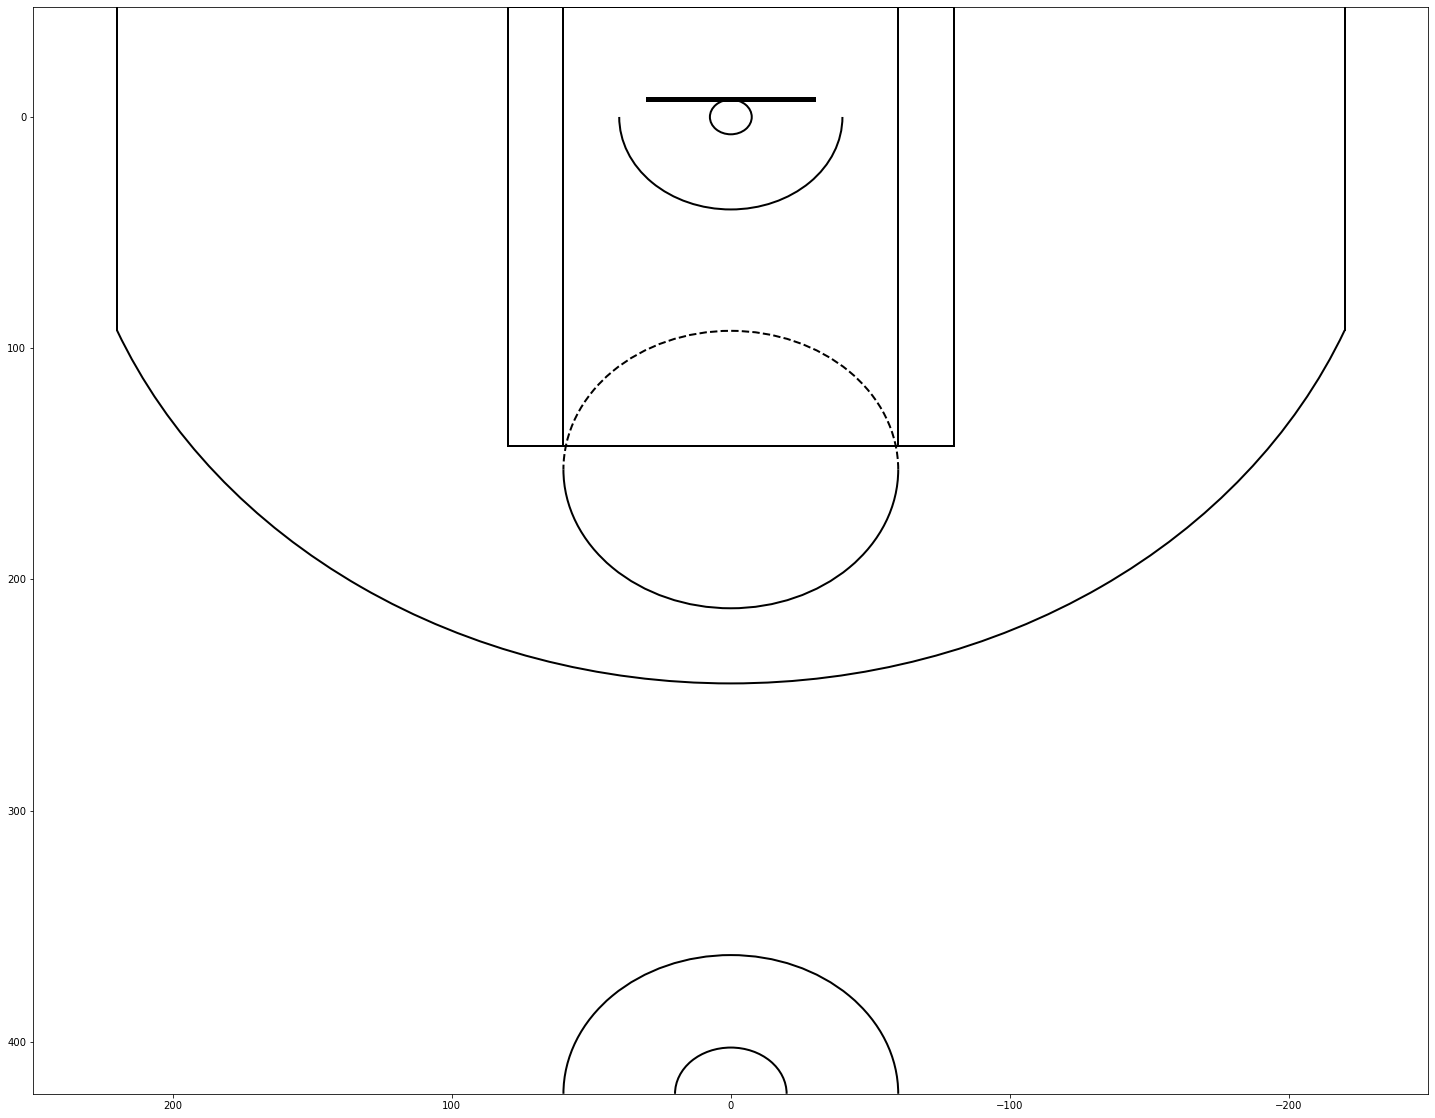

In [6]:
#Visualizar la media cancha
plt.figure(figsize=(25,19.99))
media_cancha()
plt.xlim(250,-250)
plt.ylim(422.5,-47.5)
plt.show()

In [7]:
#Dibujamos la cancha
from matplotlib.patches import Circle, Rectangle, Arc

def cancha_completa(ax=None, color='black', lw=2, outer_lines=False):
    #if an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

  #create the various parts of an NBA basketball court

  #create the basketball hoop
  #diameter of a hoop is 18" so it has a radius of 9", which is a value of 7.5 in our coordinate system
    hoop = Circle((0,0), radius = 7.5, linewidth=lw, color=color, fill=False)
    hoop1 = Circle((0,845), radius = 7.5, linewidth=lw, color=color, fill=False)

  #create backboard
    backboard = Rectangle((-30, -7), 60, -1, linewidth=lw, color=color)
    backboard1 = Rectangle((-30, 853), 60, -1, linewidth=lw, color=color)

  #the paint
  #create the outer box of the paint, width=16 ft, height=19 ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)
    outer_box1 = Rectangle((-80, 702.5), 160, 190, linewidth=lw, color=color, fill=False)

  #create the inner box of the paint, width=12 ft, hieght=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)
    inner_box1 = Rectangle((-60, 702.5), 120, 190, linewidth=lw, color=color, fill=False)

  #create the free throw top arc
    top_free_throw=Arc((0, 152.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color, fill=False)
    top_free_throw1=Arc((0, 692.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color, fill=False)

  #create the free throw bottom arc
    bottom_free_throw=Arc((0, 152.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color, linestyle='dashed')
    bottom_free_throw1=Arc((0, 692.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color, linestyle='dashed')
    
  #restricted zone, arc with 4 ft radius from center of the hoop
    restricted=Arc((0,0), 80, 80, theta1=0, theta2=180, linewidth=lw, color=color)
    restricted1=Arc((0,845), 80, 80, theta1=180, theta2=0, linewidth=lw, color=color)
    
  #three point line
  #create the side 3 point lines, 14 ft long before they before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
    corner_three_a1 = Rectangle((-220, 752.5), 0, 140, linewidth=lw, color=color)

    corner_three_b = Rectangle((220, -47.5), 0, 140,  linewidth=lw, color=color)
    corner_three_b1 = Rectangle((220, 752.5), 0, 140,  linewidth=lw, color=color)

  #three point arc, center of the arc will be the hoop, arc is 23 ft 9 inches away from the hoop
    three_arc = Arc((0,0), 475, 490, theta1=22.75, theta2=157.25, linewidth=lw, color=color)
    three_arc1 = Arc((0,845), 475, 490, theta1=202.75, theta2=337.25, linewidth=lw, color=color)

  #center court
    center_outer_arc = Arc((0,422.5), 120, 120, linewidth=lw, color=color)

    center_inner_arc = Arc((0,422.5), 40, 40, linewidth=lw, color=color)
    
    center_line = Rectangle((-220, 752.5), 0, 140, linewidth=lw, color=color)

   #outer_lines
    outer_lines = Rectangle((-250, -47.5), 500, 940, linewidth=lw, color=color, fill=False)
  #list of court elements to be poltted onto the axes
    court_elements=[hoop, hoop1, backboard, backboard1, outer_box, outer_box1, inner_box, inner_box1, top_free_throw, top_free_throw1, bottom_free_throw, bottom_free_throw1,
                 restricted, restricted1, corner_three_a, corner_three_a1, corner_three_b, corner_three_b1, three_arc, three_arc1, center_outer_arc, center_inner_arc, outer_lines]

  #add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

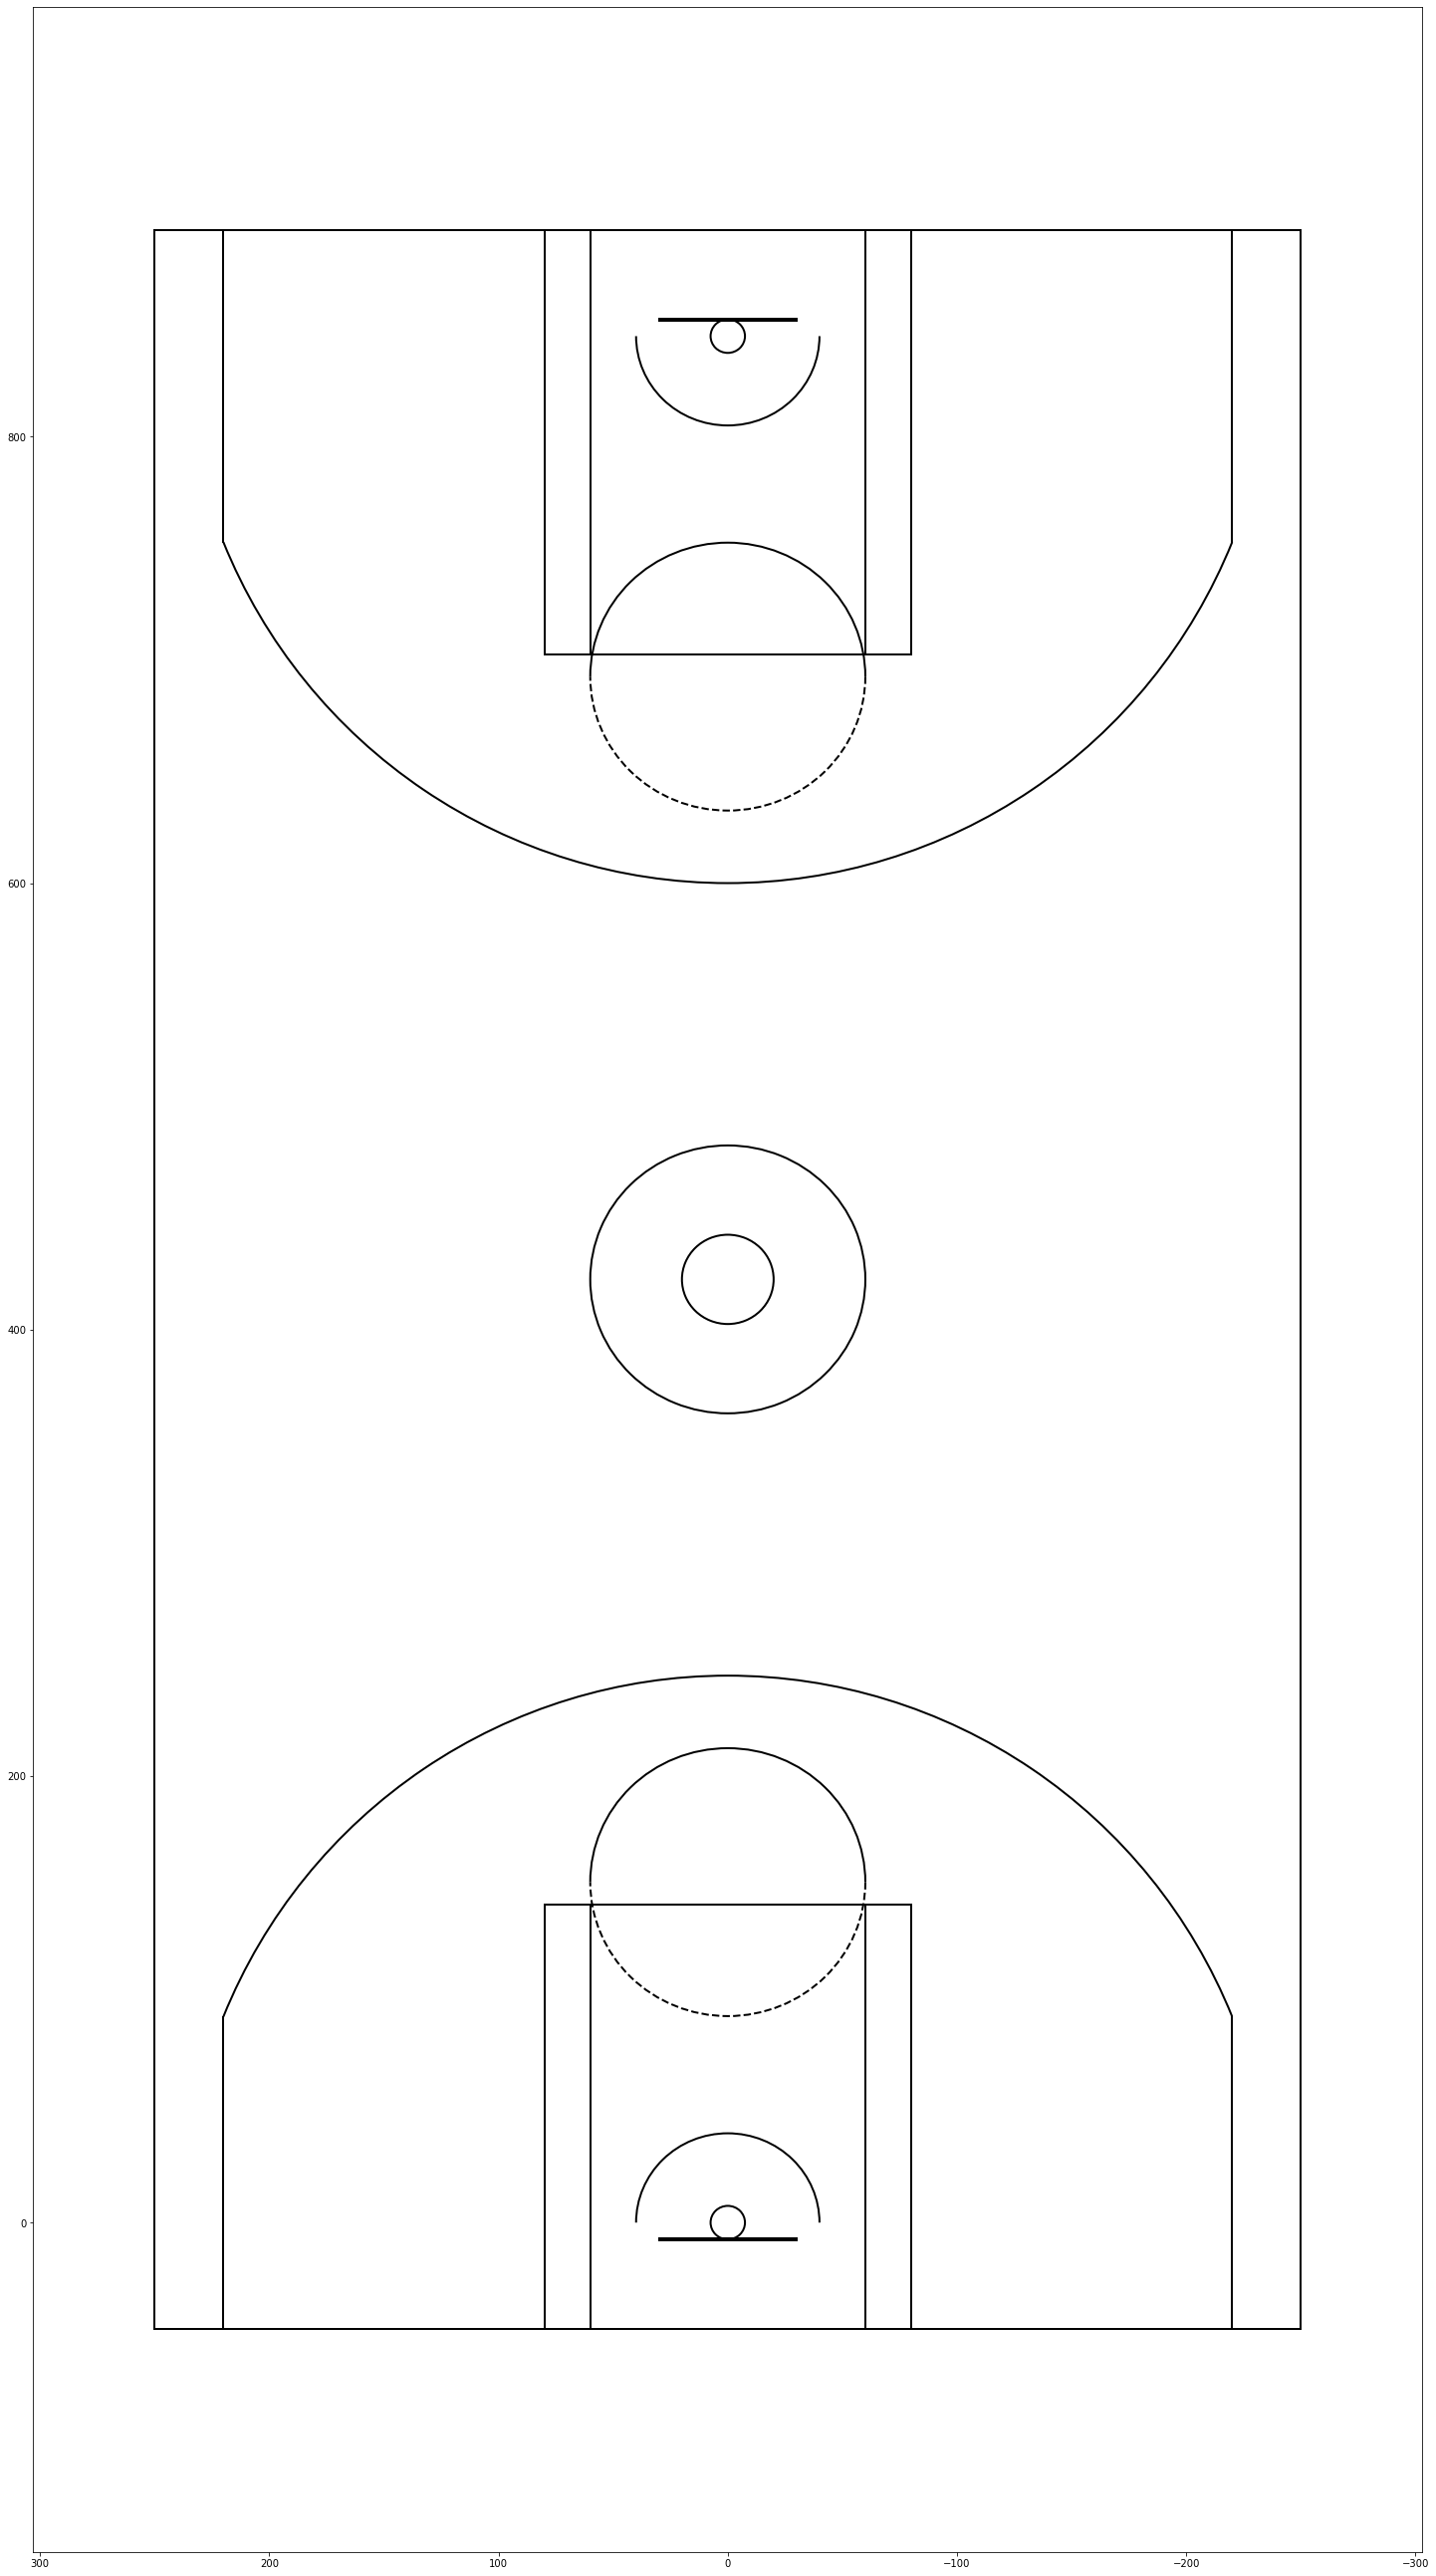

In [8]:
#Visualizar la cancha
plt.figure(figsize=(25,47))
cancha_completa()
plt.xlim(303,-303)
plt.ylim(-147.5,992.5)
plt.show()

Cogemos todos los jugadores y los equipos en la historia de la NBA y los asociamos a sus respectivos ID.

In [9]:
jugadores_equipos = tabla("https://stats.nba.com/stats/playerindex?College=&Country=&DraftPick=&DraftRound=&DraftYear=&Height=&Historical=1&LeagueID=00&Season=2020-21&SeasonType=Regular Season&TeamID=0&Weight=")
jugadores = {}
for i in range(0, len(jugadores_equipos)):
    jugadores[jugadores_equipos.PLAYER_FIRST_NAME[i] + ' ' + jugadores_equipos.PLAYER_LAST_NAME[i]] = jugadores_equipos.PERSON_ID[i]

equipos = {}
for i in range(0, len(jugadores_equipos)):
    if jugadores_equipos.TEAM_NAME.isnull()[i] == False:
        equipos[jugadores_equipos.TEAM_CITY[i] + ' ' + jugadores_equipos.TEAM_NAME[i]] = jugadores_equipos.TEAM_ID[i]
    else:
        pass

In [10]:
jugadores

{'Alaa Abdelnaby': 76001,
 'Zaid Abdul-Aziz': 76002,
 'Kareem Abdul-Jabbar': 76003,
 'Mahmoud Abdul-Rauf': 51,
 'Tariq Abdul-Wahad': 1505,
 'Shareef Abdur-Rahim': 949,
 'Tom Abernethy': 76005,
 'Forest Able': 76006,
 'John Abramovic': 76007,
 'Alex Abrines': 203518,
 'Precious Achiuwa': 1630173,
 'Alex Acker': 101165,
 'Donald Ackerman': 76008,
 'Mark Acres': 76009,
 'Charles Acton': 76010,
 'Quincy Acy': 203112,
 'Alvan Adams': 76011,
 'Don Adams': 76012,
 'Hassan Adams': 200801,
 'Jaylen Adams': 1629121,
 'Jordan Adams': 203919,
 'Michael Adams': 149,
 'Steven Adams': 203500,
 'Rafael Addison': 912,
 'Bam Adebayo': 1628389,
 'Deng Adel': 1629061,
 'Rick Adelman': 76015,
 'Jeff Adrien': 202399,
 'Arron Afflalo': 201167,
 'Maurice Ager': 200772,
 'Mark Aguirre': 76016,
 'Blake Ahearn': 201336,
 'Danny Ainge': 76017,
 'Alexis Ajinca': 201582,
 'Henry Akin': 76018,
 'Josh Akognon': 203006,
 'DeVaughn Akoon-Purcell': 1629152,
 'Solomon Alabi': 202374,
 'Mark Alarie': 76019,
 'Gary Alcorn'

In [11]:
equipos

{'Portland Trail Blazers': 1610612757.0,
 'Houston Rockets': 1610612745.0,
 'Los Angeles Lakers': 1610612747.0,
 'Denver Nuggets': 1610612743.0,
 'Sacramento Kings': 1610612758.0,
 'Memphis Grizzlies': 1610612763.0,
 'Golden State Warriors': 1610612744.0,
 'Philadelphia 76ers': 1610612755.0,
 'Pittsburgh Ironmen': 1610610031.0,
 'Oklahoma City Thunder': 1610612760.0,
 'Miami Heat': 1610612748.0,
 'LA Clippers': 1610612746.0,
 'New York Knicks': 1610612752.0,
 'Orlando Magic': 1610612753.0,
 'Phoenix Suns': 1610612756.0,
 'Detroit Pistons': 1610612765.0,
 'Brooklyn Nets': 1610612751.0,
 'Milwaukee Bucks': 1610612749.0,
 'New Orleans Pelicans': 1610612740.0,
 'Cleveland Cavaliers': 1610612739.0,
 'Charlotte Hornets': 1610612766.0,
 'Dallas Mavericks': 1610612742.0,
 'Boston Celtics': 1610612738.0,
 'Toronto Raptors': 1610612761.0,
 'Washington Wizards': 1610612764.0,
 'San Antonio Spurs': 1610612759.0,
 'Chicago Bulls': 1610612741.0,
 'Indiana Pacers': 1610612754.0,
 'Utah Jazz': 1610612

## 1. Gráfico de un jugador

La siguiente función recibe el nombre de un jugador, el año y el tipo de gráfico que queremos mostrar y devuelve una media cancha con los lanzamientos escogidos.

- jugador: Tiene que ir entre comillas y no puede quedarse en blanco. Ejemplo: "LeBron James"
- año: Tiene que ir entre comillas y con el formato XXXX-YY. Si se quieren obtener los tiros de un jugador a lo largo de su carrera, debemos dejar en blanco el campo de año. Ejemplos: "2010-11" o "" 
- grafico: Se debe seleccionar 1, 2, 3 o 4. Los diferentes gráficos los veremos en los ejemplos.

In [12]:
def tiros_jugador(jugador, año, grafico):
    url = 'https://stats.nba.com/stats/shotchartdetail?AheadBehind=&CFID=&CFPARAMS=&ClutchTime=&Conference=&ContextFilter=&ContextMeasure=FGA&DateFrom=&DateTo=&Division=&EndPeriod=10&EndRange=28800&GROUP_ID=&GameEventID=&GameID=&GameSegment=&GroupID=&GroupMode=&GroupQuantity=5&LastNGames=0&LeagueID=00&Location=&Month=0&OnOff=&OpponentTeamID=0&Outcome=&PORound=0&Period=0&PlayerID=' + str(jugadores[jugador]) + '&PlayerID1=&PlayerID2=&PlayerID3=&PlayerID4=&PlayerID5=&PlayerPosition=&PointDiff=&Position=&RangeType=0&RookieYear=&Season=' + str(año) + '&SeasonSegment=&SeasonType=Regular Season&ShotClockRange=&StartPeriod=1&StartRange=0&StarterBench=&TeamID=0&VsConference=&VsDivision=&VsPlayerID1=&VsPlayerID2=&VsPlayerID3=&VsPlayerID4=&VsPlayerID5=&VsTeamID='
    datos = tabla(url)
    if grafico == 1:
        joint_shot_chart = sns.jointplot(x=datos["LOC_X"], y=datos["LOC_Y"], kind='scatter', space=0, alpha=0.5)
        joint_shot_chart.fig.set_size_inches(25,19.99)
        ax = joint_shot_chart.ax_joint
        ax.set_ylim(422.5,-47.5)
        ax.set_xlim(250,-250)
        media_cancha(ax)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.tick_params(labelbottom='off', labelleft='off')
    elif grafico == 2:
        joint_shot_chart = sns.jointplot(data=datos, x=datos["LOC_X"], y=datos["LOC_Y"], kind="hex")
        joint_shot_chart.fig.set_size_inches(25,19.99)
        ax = joint_shot_chart.ax_joint
        ax.set_ylim(422.5,-47.5)
        ax.set_xlim(250,-250)
        media_cancha(ax)
    elif grafico == 3:
        joint_shot_chart = sns.jointplot(data=datos, x=datos["LOC_X"], y=datos["LOC_Y"], hue="EVENT_TYPE", palette=["green", "red"])
        joint_shot_chart.fig.set_size_inches(25,19.99)
        ax = joint_shot_chart.ax_joint
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_ylim([422.5,-47.5])
        ax.set_xlim([250,-250])
        media_cancha(ax)
    elif grafico == 4:
        joint_shot_chart = sns.jointplot(data=datos, x="LOC_X", y="LOC_Y", kind="hist")
        joint_shot_chart.fig.set_size_inches(25,19.99)
        ax = joint_shot_chart.ax_joint
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_ylim([422.5,-47.5])
        ax.set_xlim([250,-250])
        media_cancha(ax)
    if año == "":
        ax.set_title('Mapa de todos los tiros de ' + jugador + '\n', y=1.2, fontsize=20)
    else:
        ax.set_title('Mapa de tiros de ' + jugador + '\n' + '(' + año + ')\n', y=1.2, fontsize=20)
    return plt.show()

### 1.1 Ejemplo 1

El gráfico 1 representa los puntos de cada lanzamiento con histogramas en los márgenes.

Se toman los tiros de Stephen Curry en la temporada 2016-17.

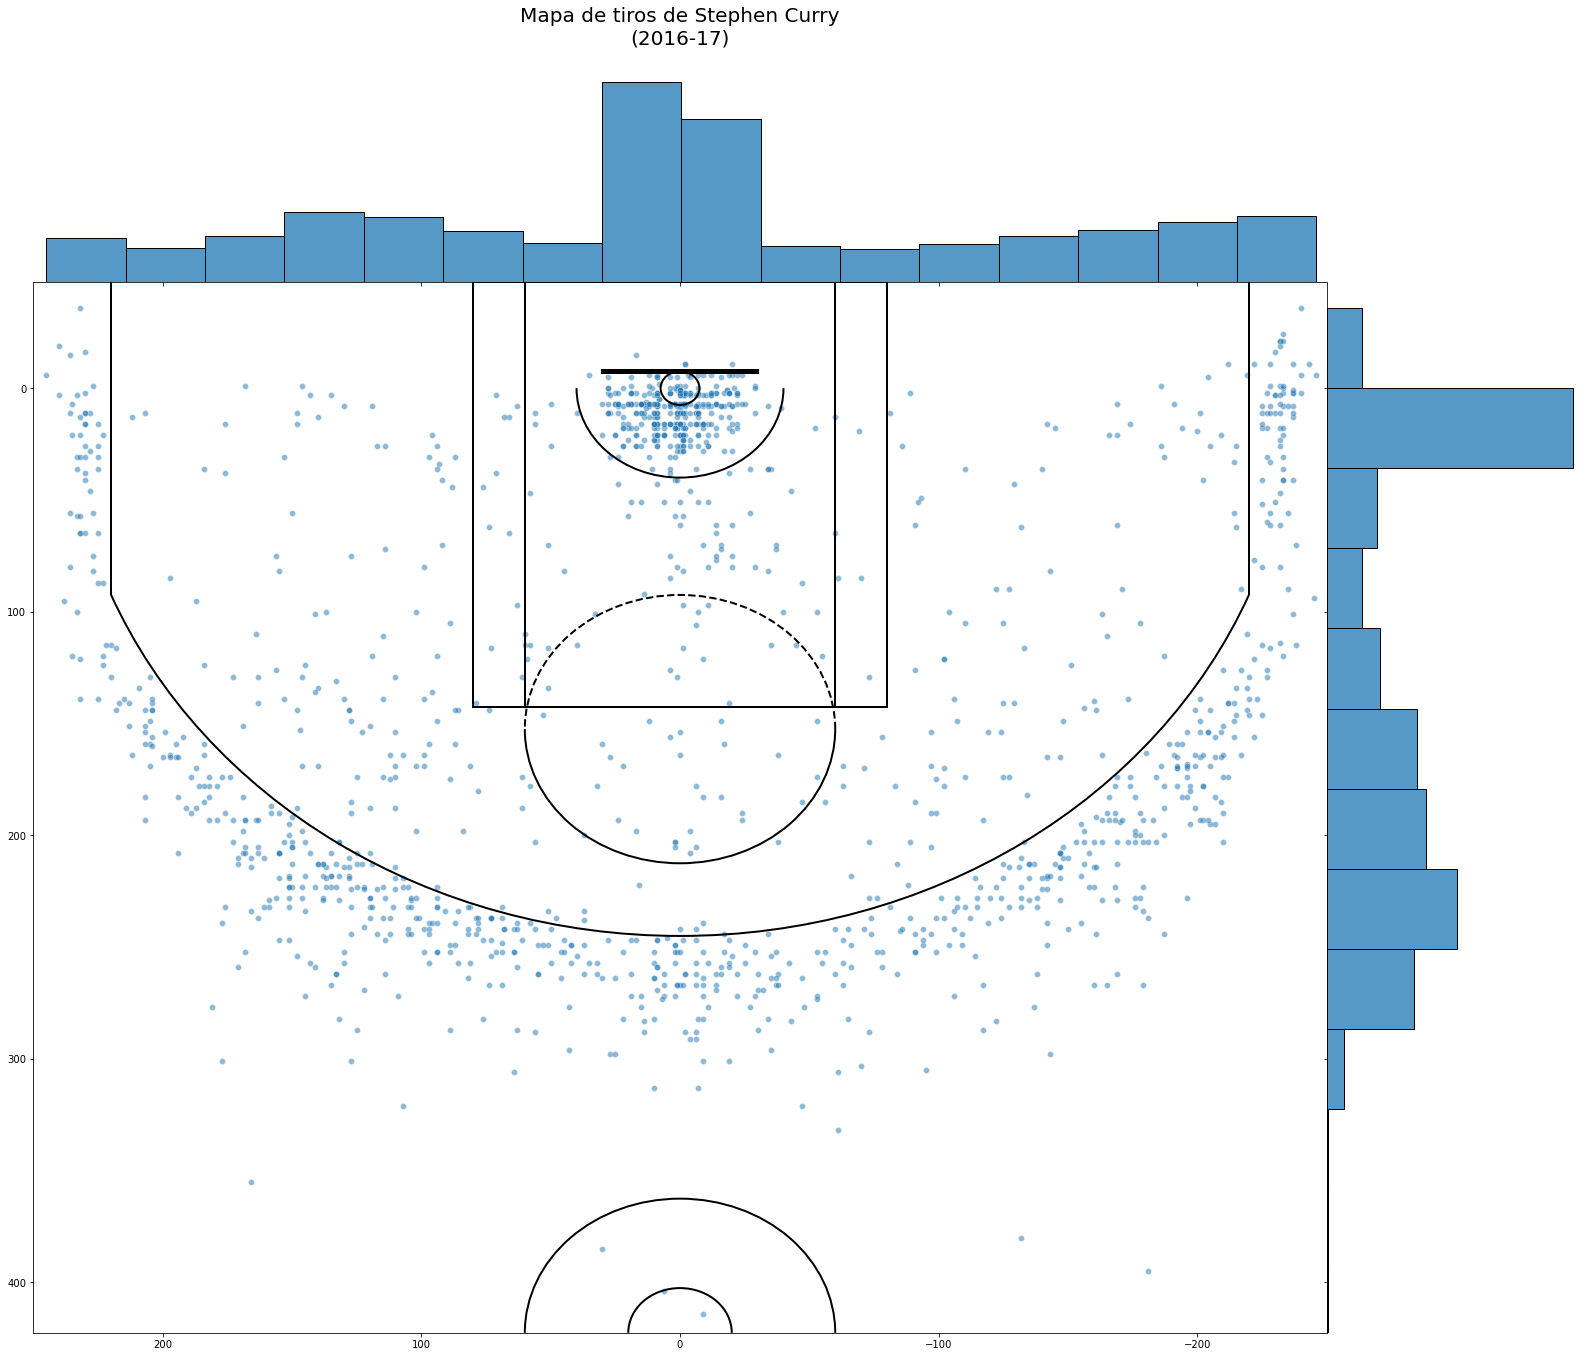

In [13]:
tiros_jugador("Stephen Curry", "2016-17", 1)

### 1.2 Ejemplo 2

El gráfico 2 representa la información mediante hexágonos con la ayuda de histogramas marginales.

Se toman los tiros de Luka Doncic en la temporada 2019-20.

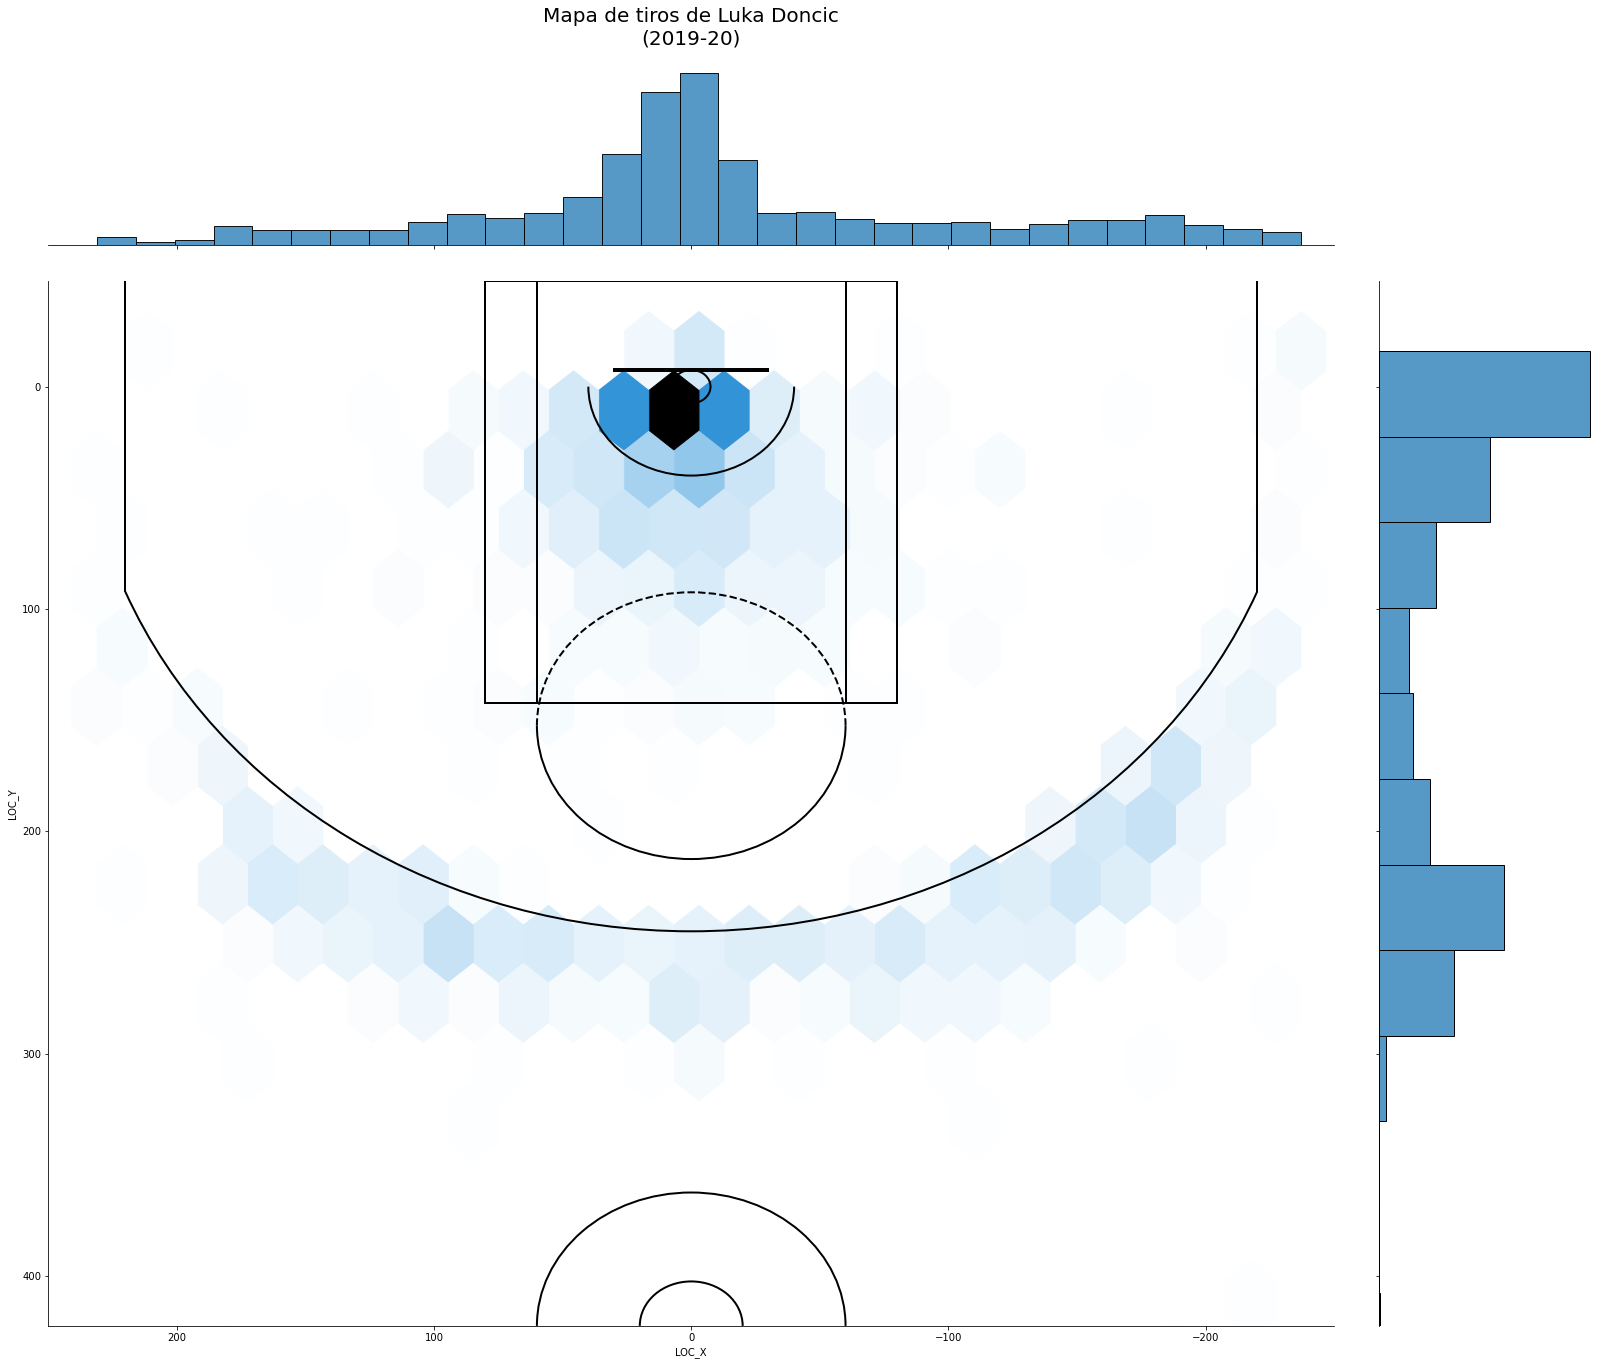

In [14]:
tiros_jugador("Luka Doncic", "2019-20", 2)

### 1.3 Ejemplo 3

El gráfico 3 muestra la información dividida en tiros anotados (verde) y tiros fallados (rojo).

Se toman todos los tiros de la carrera de Michael Jordan.

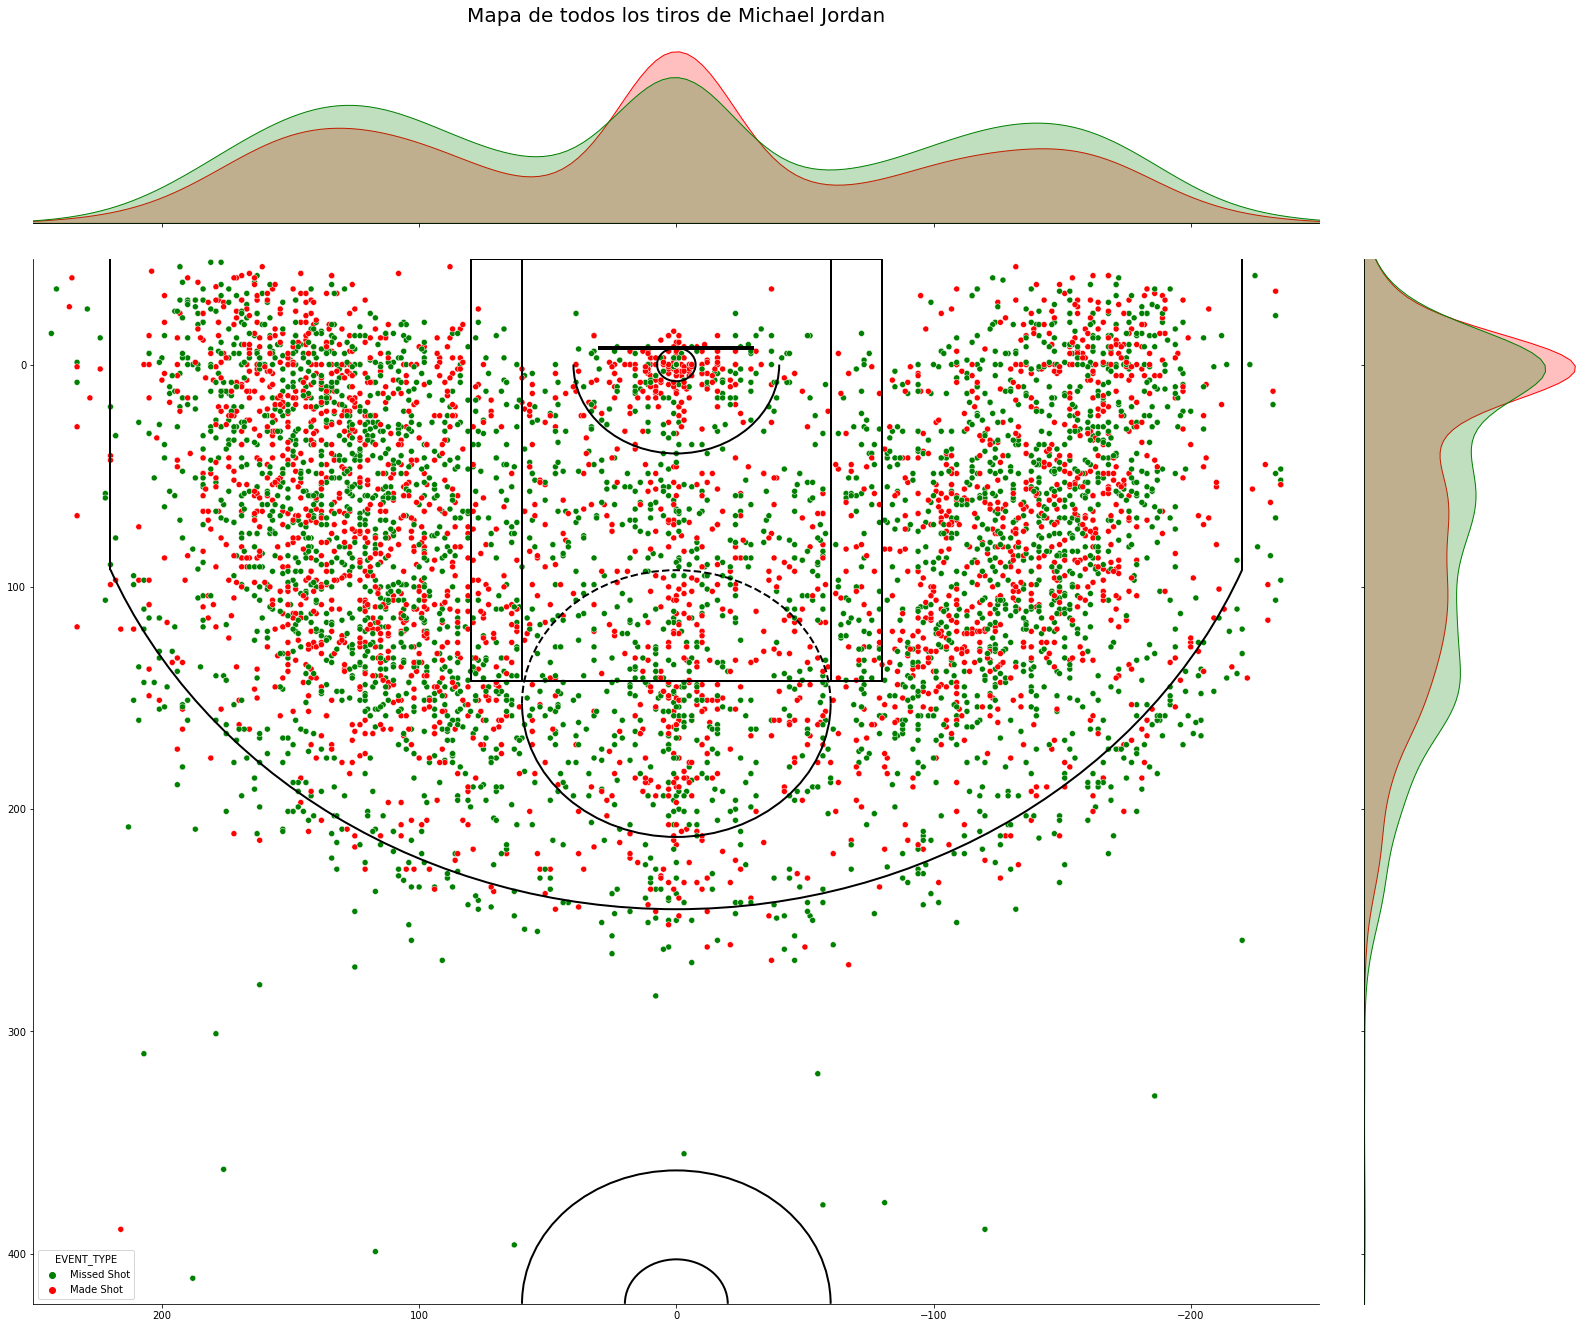

In [15]:
tiros_jugador("Michael Jordan", "", 3)

### 1.4 Ejemplo 4

El gráfico 4 representa los datos en cuadrículas, acompañando de histogramas marginales.

Se toman los tiros de Tim Duncan durante la temporada 2003-04.

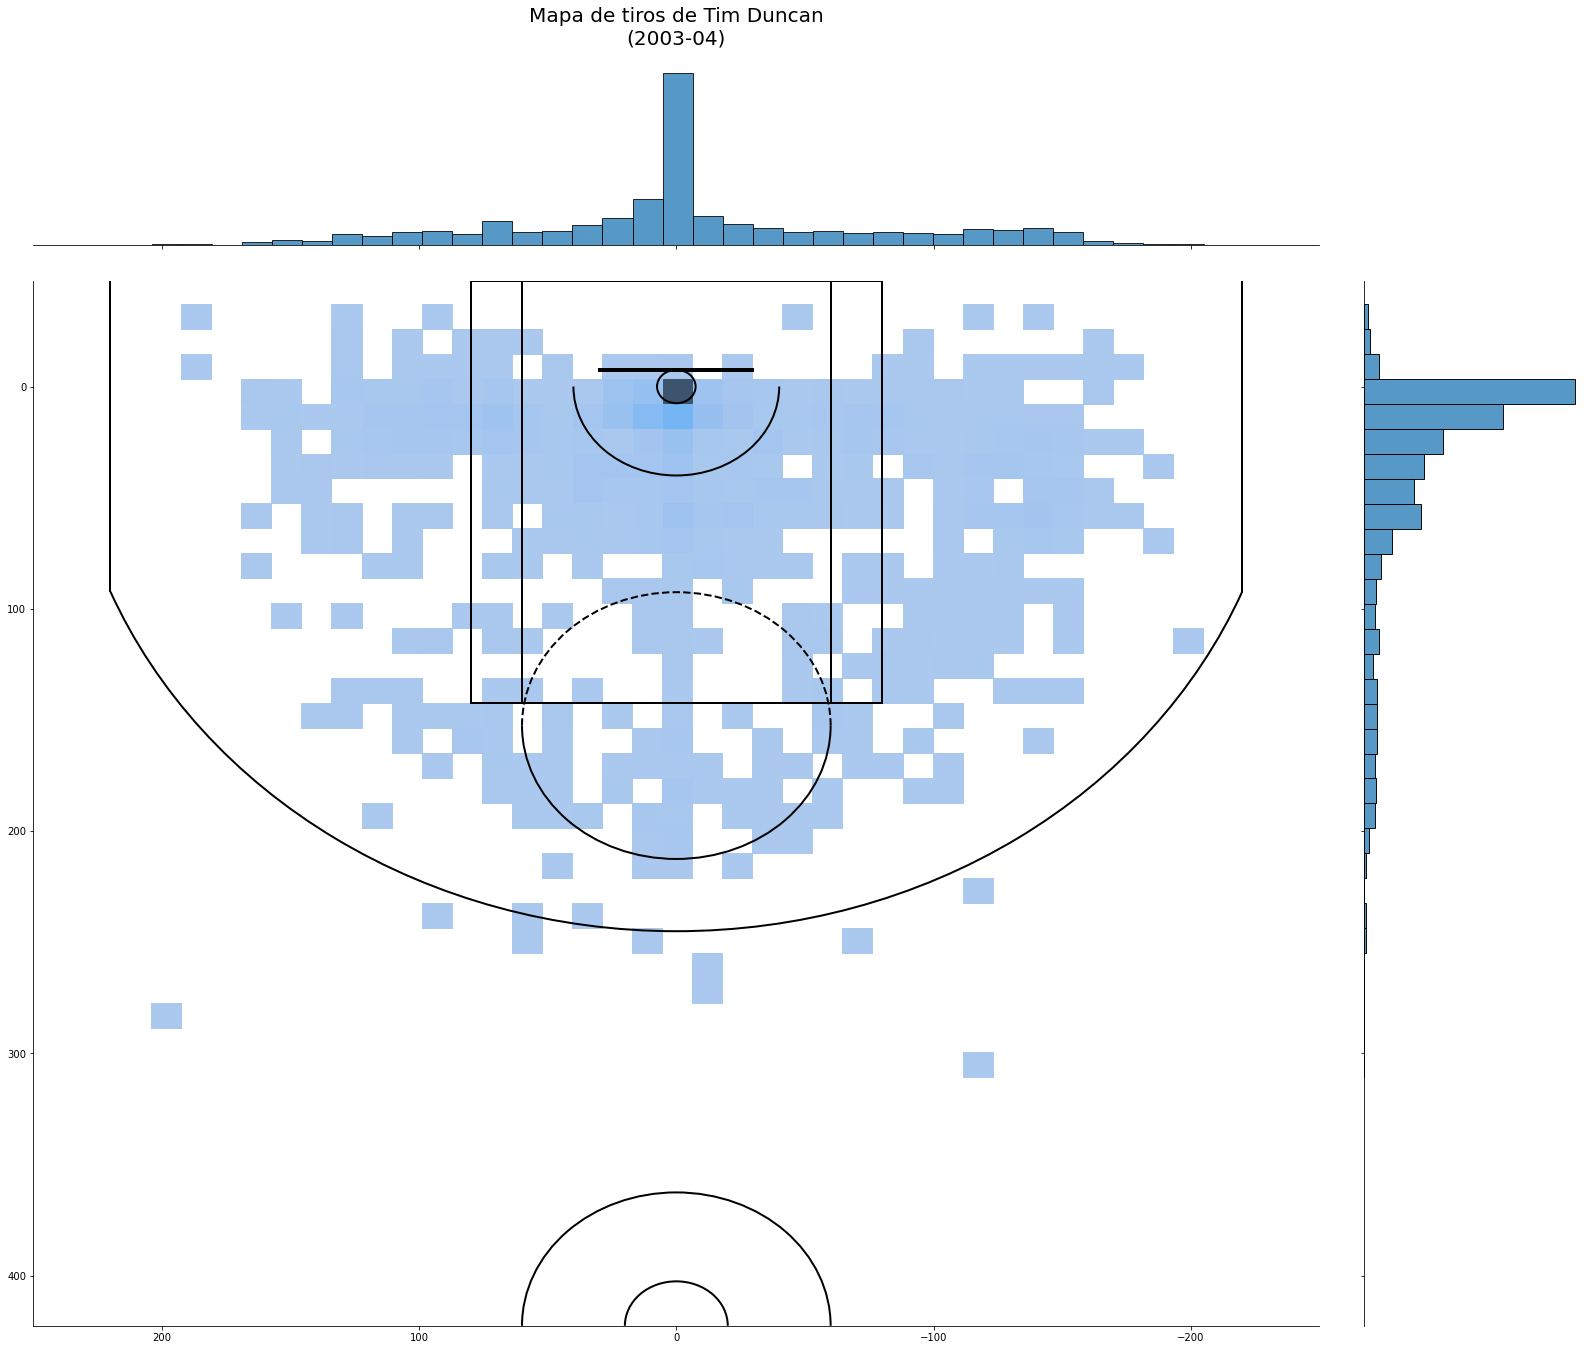

In [16]:
tiros_jugador("Tim Duncan", "2003-04", 4)

## 2. Gráfico de un equipo

La siguiente función recibe el nombre de un equipo, el año y el tipo de gráfico que queremos mostrar y devuelve una media cancha con los lanzamientos escogidos.

- equipo: Tiene que ir entre comillas y no puede quedarse en blanco. Ejemplo: "Boston Celtics"
- año: Tiene que ir entre comillas y con el formato XXXX-YY. No puede quedarse en blanco. Ejemplo: "2020-21"
- grafico: Se debe seleccionar 1, 2, 3 o 4. Los diferentes gráficos son idénticos a los ejemplos de jugadores individuales.

In [17]:
def tiros_equipo(equipo, año, grafico):
    url = 'https://stats.nba.com/stats/shotchartdetail?AheadBehind=&CFID=&CFPARAMS=&ClutchTime=&Conference=&ContextFilter=&ContextMeasure=FGA&DateFrom=&DateTo=&Division=&EndPeriod=10&EndRange=28800&GROUP_ID=&GameEventID=&GameID=&GameSegment=&GroupID=&GroupMode=&GroupQuantity=5&LastNGames=0&LeagueID=00&Location=&Month=0&OnOff=&OpponentTeamID=0&Outcome=&PORound=0&Period=0&PlayerID=0&PlayerID1=&PlayerID2=&PlayerID3=&PlayerID4=&PlayerID5=&PlayerPosition=&PointDiff=&Position=&RangeType=0&RookieYear=&Season=' + str(año) + '&SeasonSegment=&SeasonType=Regular Season&ShotClockRange=&StartPeriod=1&StartRange=0&StarterBench=&TeamID=' + str(int(equipos[equipo])) + '&VsConference=&VsDivision=&VsPlayerID1=&VsPlayerID2=&VsPlayerID3=&VsPlayerID4=&VsPlayerID5=&VsTeamID='
    datos = tabla(url)
    if grafico == 1:
        joint_shot_chart = sns.jointplot(x=datos["LOC_X"], y=datos["LOC_Y"], kind='scatter', space=0, alpha=0.5)
        joint_shot_chart.fig.set_size_inches(25,19.99)
        ax = joint_shot_chart.ax_joint
        ax.set_ylim(422.5,-47.5)
        ax.set_xlim(250,-250)
        media_cancha(ax)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.tick_params(labelbottom='off', labelleft='off')
    elif grafico == 2:
        joint_shot_chart = sns.jointplot(data=datos, x=datos["LOC_X"], y=datos["LOC_Y"], kind="hex")
        joint_shot_chart.fig.set_size_inches(25,19.99)
        ax = joint_shot_chart.ax_joint
        ax.set_ylim(422.5,-47.5)
        ax.set_xlim(250,-250)
        media_cancha(ax)
    elif grafico == 3:
        joint_shot_chart = sns.jointplot(data=datos, x=datos["LOC_X"], y=datos["LOC_Y"], hue="EVENT_TYPE", palette=["green", "red"])
        joint_shot_chart.fig.set_size_inches(25,19.99)
        ax = joint_shot_chart.ax_joint
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_ylim([422.5,-47.5])
        ax.set_xlim([250,-250])
        media_cancha(ax)
    elif grafico == 4:
        joint_shot_chart = sns.jointplot(data=datos, x="LOC_X", y="LOC_Y", kind="hist")
        joint_shot_chart.fig.set_size_inches(25,19.99)
        ax = joint_shot_chart.ax_joint
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_ylim([422.5,-47.5])
        ax.set_xlim([250,-250])
        media_cancha(ax)        
    ax.set_title('Mapa de tiros de ' + equipo + '\n' + '(' + año + ')\n', y=1.2, fontsize=20)
    return plt.show()

### 2.1 Ejemplo 1

Los gráficos serían similares a los mostrados donde los jugadores. A modo de ejemplo se indica el primero de ellos de los Mavericks en la temporada 2000-01.

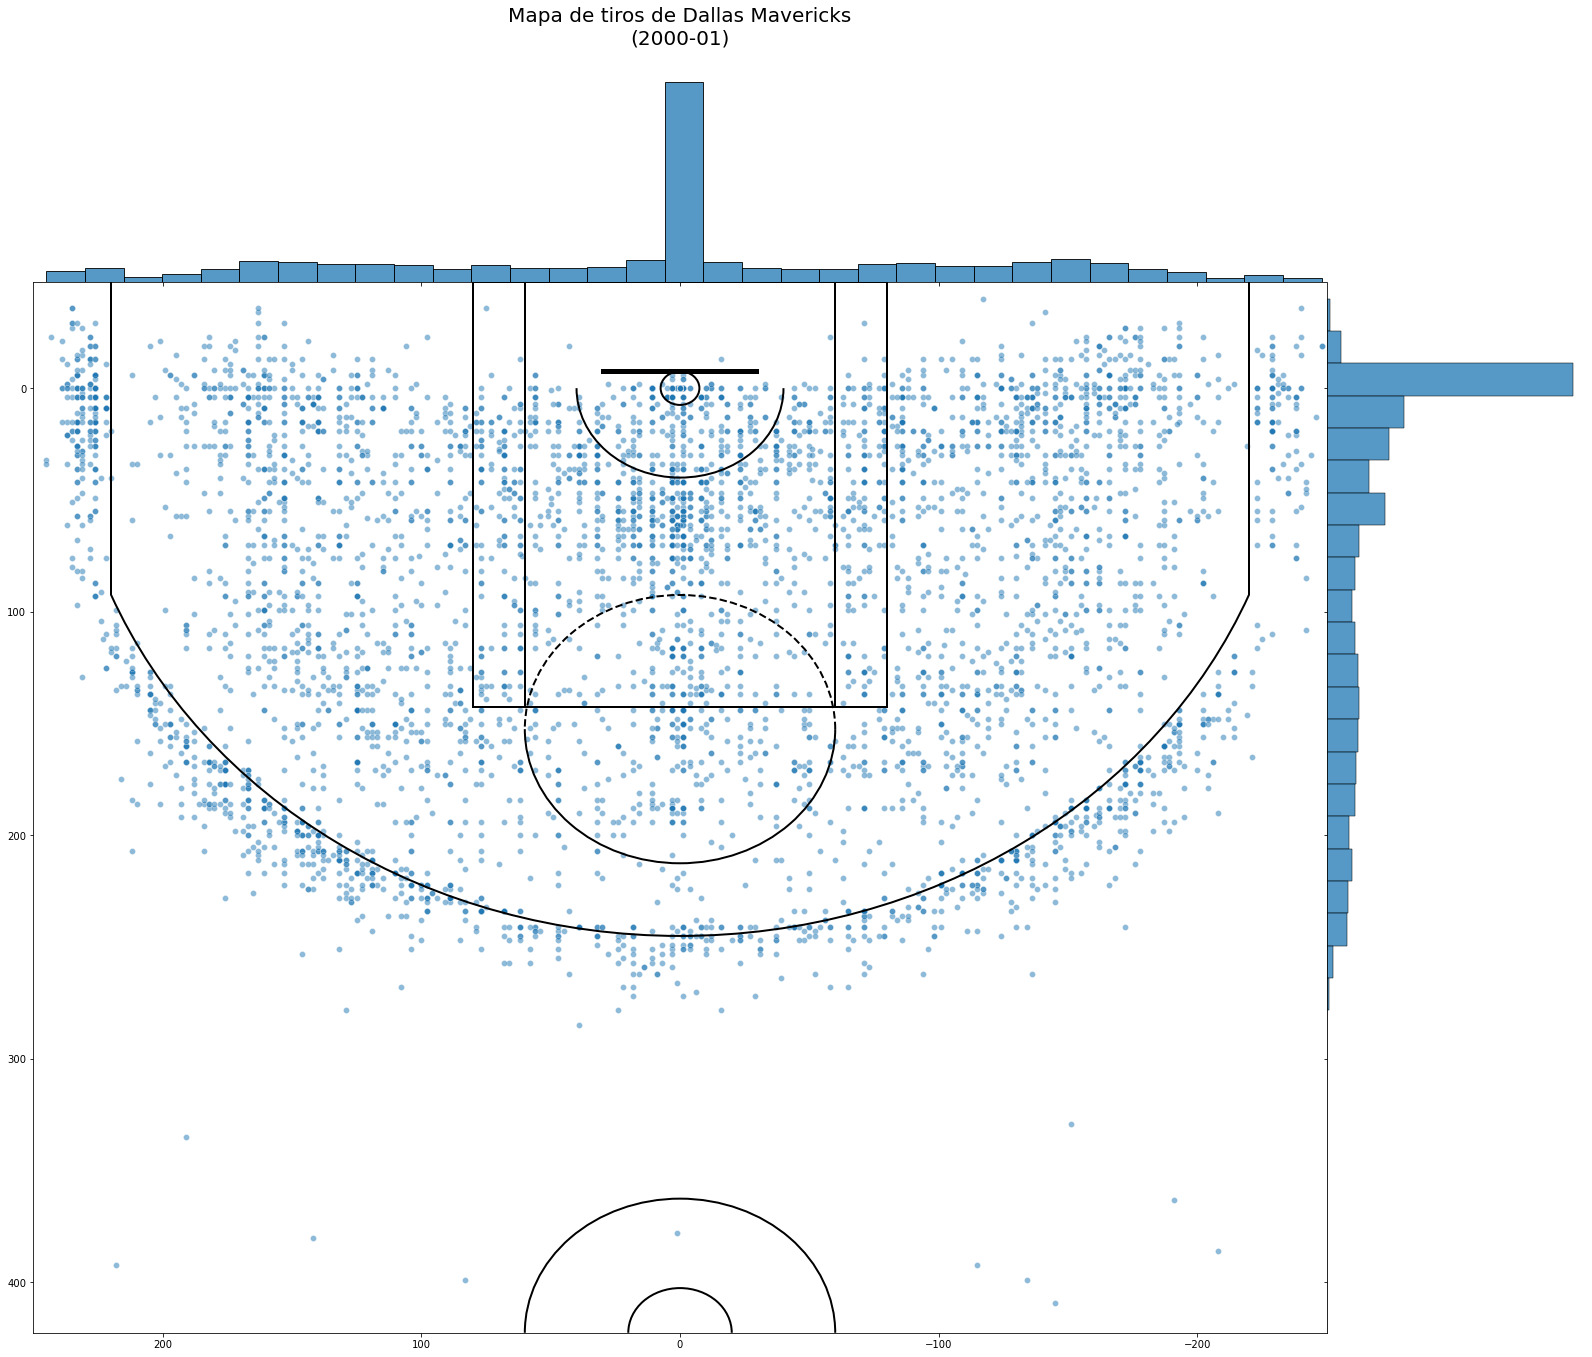

In [18]:
tiros_equipo("Dallas Mavericks", "2000-01", 1)

## 3. Comparación de jugadores
### 3.1 Media cancha

La siguiente función recibe el nombre del primer jugador y su año y el nombre del segundo jugador y su año.

- jugador1: Tiene que ir entre comillas y no puede quedarse en blanco. Ejemplo: "LeBron James"
- año1: Tiene que ir entre comillas y con el formato XXXX-YY. Si se quieren obtener los tiros de un jugador a lo largo de su carrera, debemos dejar en blanco el campo de año. Ejemplos: "2010-11" o "" 
- jugador2: Idéntinco a jugador1.
- año2: Idéntico a año1.

In [19]:
def comparar_jugadores(jugador1, año1, jugador2, año2):
    url1 = 'https://stats.nba.com/stats/shotchartdetail?AheadBehind=&CFID=&CFPARAMS=&ClutchTime=&Conference=&ContextFilter=&ContextMeasure=FGA&DateFrom=&DateTo=&Division=&EndPeriod=10&EndRange=28800&GROUP_ID=&GameEventID=&GameID=&GameSegment=&GroupID=&GroupMode=&GroupQuantity=5&LastNGames=0&LeagueID=00&Location=&Month=0&OnOff=&OpponentTeamID=0&Outcome=&PORound=0&Period=0&PlayerID=' + str(jugadores[jugador1]) + '&PlayerID1=&PlayerID2=&PlayerID3=&PlayerID4=&PlayerID5=&PlayerPosition=&PointDiff=&Position=&RangeType=0&RookieYear=&Season=' + str(año1) + '&SeasonSegment=&SeasonType=Regular Season&ShotClockRange=&StartPeriod=1&StartRange=0&StarterBench=&TeamID=0&VsConference=&VsDivision=&VsPlayerID1=&VsPlayerID2=&VsPlayerID3=&VsPlayerID4=&VsPlayerID5=&VsTeamID='
    datos1 = tabla(url1)
    datos1["SEASON"] = str(año1)
    url2 = 'https://stats.nba.com/stats/shotchartdetail?AheadBehind=&CFID=&CFPARAMS=&ClutchTime=&Conference=&ContextFilter=&ContextMeasure=FGA&DateFrom=&DateTo=&Division=&EndPeriod=10&EndRange=28800&GROUP_ID=&GameEventID=&GameID=&GameSegment=&GroupID=&GroupMode=&GroupQuantity=5&LastNGames=0&LeagueID=00&Location=&Month=0&OnOff=&OpponentTeamID=0&Outcome=&PORound=0&Period=0&PlayerID=' + str(jugadores[jugador2]) + '&PlayerID1=&PlayerID2=&PlayerID3=&PlayerID4=&PlayerID5=&PlayerPosition=&PointDiff=&Position=&RangeType=0&RookieYear=&Season=' + str(año2) + '&SeasonSegment=&SeasonType=Regular Season&ShotClockRange=&StartPeriod=1&StartRange=0&StarterBench=&TeamID=0&VsConference=&VsDivision=&VsPlayerID1=&VsPlayerID2=&VsPlayerID3=&VsPlayerID4=&VsPlayerID5=&VsTeamID='
    datos2 = tabla(url2)
    datos2["SEASON"] = str(año2)
    datos = pd.concat([datos1, datos2])
    datos["PLAYER_NAME"] = datos["PLAYER_NAME"] + ' ' + datos["SEASON"]
    joint_shot_chart = sns.jointplot(data=datos, x=datos["LOC_X"], y=datos["LOC_Y"], hue="PLAYER_NAME")
    joint_shot_chart.fig.set_size_inches(25,19.9)
    ax = joint_shot_chart.ax_joint
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim([422.5,-47.5])
    ax.set_xlim([250,-250])
    media_cancha(ax)
    if año1 == "" and año2 == "":
        ax.set_title('Todos los tiros de ' + jugador1 + ' y de ' + jugador2 + '\n', y=1.2, fontsize=20)
    elif año1 == "" and año2 != "":
        ax.set_title('Todos los tiros de ' + jugador1 + ' y mapa de tiros de ' + jugador2 + ' (' + año2 + ')\n', y=1.2, fontsize=20)
    elif año1 != "" and año2 == "":
        ax.set_title('Mapa de tiros de ' + jugador1 + ' (' + año1 + ') y todos los tiros de ' + jugador2 + '\n', y=1.2, fontsize=20)
    else:
        ax.set_title('Mapa de tiros de ' + jugador1 + ' (' + año1 + ') y de ' + jugador2 + ' (' + año2 + ')\n', y=1.2, fontsize=20)
    return plt.show()

#### 3.1.1 Ejemplo 1

En el ejemplo comparamos la temporada 2017-18 de Stephen Curry con todos los tiros de la carrera de Trae Young.

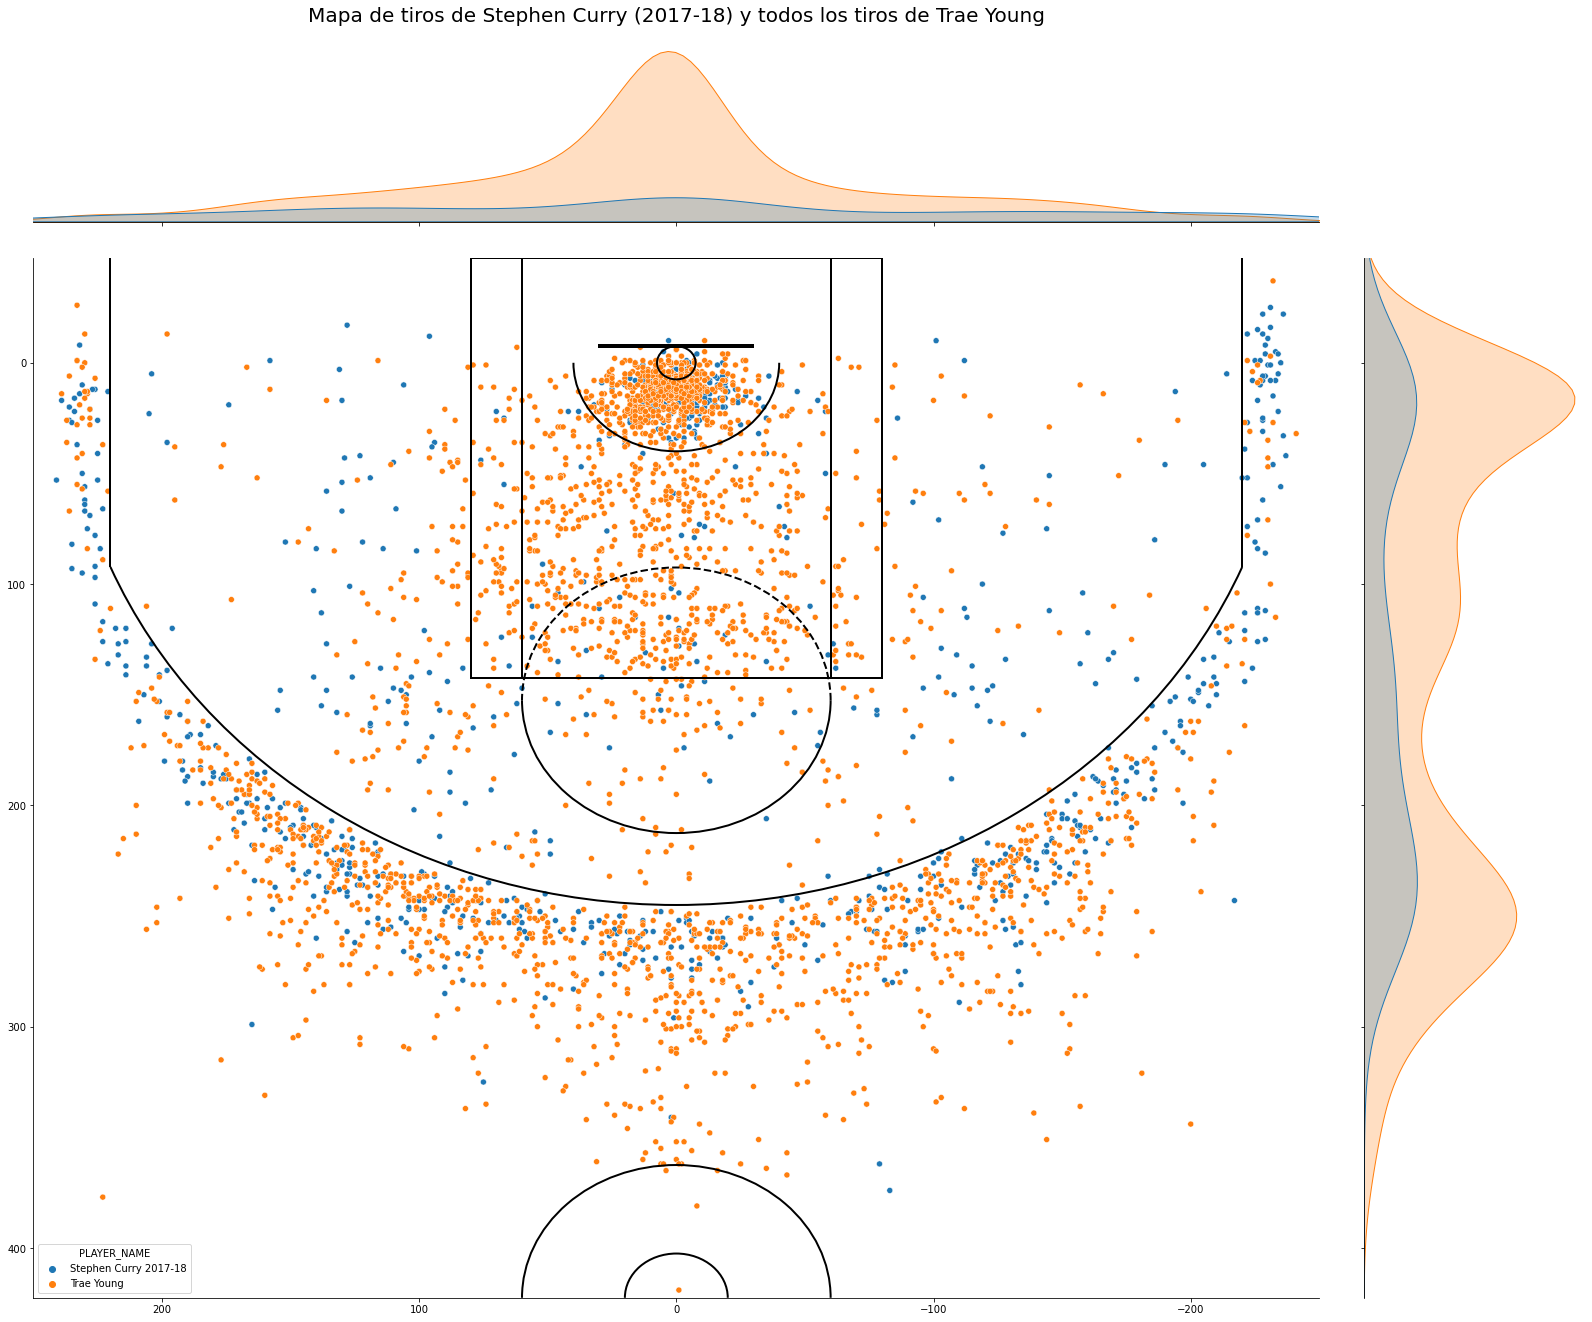

In [20]:
comparar_jugadores("Stephen Curry", "2017-18", "Trae Young", "")

### 3.2 Cancha completa

Exactamente igual que la función anterior, pero con los datos mostrados en los dos lados de la pista.

In [21]:
def comparar_jugadores_cancha_entera(jugador1, año1, jugador2, año2):
    url1 = 'https://stats.nba.com/stats/shotchartdetail?AheadBehind=&CFID=&CFPARAMS=&ClutchTime=&Conference=&ContextFilter=&ContextMeasure=FGA&DateFrom=&DateTo=&Division=&EndPeriod=10&EndRange=28800&GROUP_ID=&GameEventID=&GameID=&GameSegment=&GroupID=&GroupMode=&GroupQuantity=5&LastNGames=0&LeagueID=00&Location=&Month=0&OnOff=&OpponentTeamID=0&Outcome=&PORound=0&Period=0&PlayerID=' + str(jugadores[jugador1]) + '&PlayerID1=&PlayerID2=&PlayerID3=&PlayerID4=&PlayerID5=&PlayerPosition=&PointDiff=&Position=&RangeType=0&RookieYear=&Season=' + str(año1) + '&SeasonSegment=&SeasonType=Regular Season&ShotClockRange=&StartPeriod=1&StartRange=0&StarterBench=&TeamID=0&VsConference=&VsDivision=&VsPlayerID1=&VsPlayerID2=&VsPlayerID3=&VsPlayerID4=&VsPlayerID5=&VsTeamID='
    datos1 = tabla(url1)
    datos1["SEASON"] = str(año1)
    url2 = 'https://stats.nba.com/stats/shotchartdetail?AheadBehind=&CFID=&CFPARAMS=&ClutchTime=&Conference=&ContextFilter=&ContextMeasure=FGA&DateFrom=&DateTo=&Division=&EndPeriod=10&EndRange=28800&GROUP_ID=&GameEventID=&GameID=&GameSegment=&GroupID=&GroupMode=&GroupQuantity=5&LastNGames=0&LeagueID=00&Location=&Month=0&OnOff=&OpponentTeamID=0&Outcome=&PORound=0&Period=0&PlayerID=' + str(jugadores[jugador2]) + '&PlayerID1=&PlayerID2=&PlayerID3=&PlayerID4=&PlayerID5=&PlayerPosition=&PointDiff=&Position=&RangeType=0&RookieYear=&Season=' + str(año2) + '&SeasonSegment=&SeasonType=Regular Season&ShotClockRange=&StartPeriod=1&StartRange=0&StarterBench=&TeamID=0&VsConference=&VsDivision=&VsPlayerID1=&VsPlayerID2=&VsPlayerID3=&VsPlayerID4=&VsPlayerID5=&VsTeamID='
    datos2 = tabla(url2)
    datos2["SEASON"] = str(año2)
    datos2['LOC_X'] = datos2['LOC_X'].apply(lambda x: -x)
    datos2['LOC_Y'] = datos2['LOC_Y'].apply(lambda x: 845-x)
    datos = pd.concat([datos1, datos2])
    datos["PLAYER_NAME"] = datos["PLAYER_NAME"] + ' ' + datos["SEASON"]
    joint_shot_chart = sns.jointplot(data=datos, x=datos["LOC_X"], y=datos["LOC_Y"], hue="PLAYER_NAME")
    joint_shot_chart.fig.set_size_inches(25,47)
    ax = joint_shot_chart.ax_joint
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(-147.5,992.5)
    ax.set_xlim(303,-303)
    cancha_completa(ax)
    if año1 == "" and año2 == "":
        ax.set_title('Todos los tiros de ' + jugador1 + ' y de ' + jugador2 + '\n', y=1.2, fontsize=20)
    elif año1 == "" and año2 != "":
        ax.set_title('Todos los tiros de ' + jugador1 + ' y mapa de tiros de ' + jugador2 + ' (' + año2 + ')\n', y=1.2, fontsize=20)
    elif año1 != "" and año2 == "":
        ax.set_title('Mapa de tiros de ' + jugador1 + ' (' + año1 + ') y todos los tiros de ' + jugador2 + '\n', y=1.2, fontsize=20)
    else:
        ax.set_title('Mapa de tiros de ' + jugador1 + ' (' + año1 + ') y de ' + jugador2 + ' (' + año2 + ')\n', y=1.2, fontsize=20)
    return plt.show()

#### 3.2.1 Ejemplo 1

En el ejemplo comparamos los datos de Jimmy Butler en las temporadas 2018-19 y 2019-20.

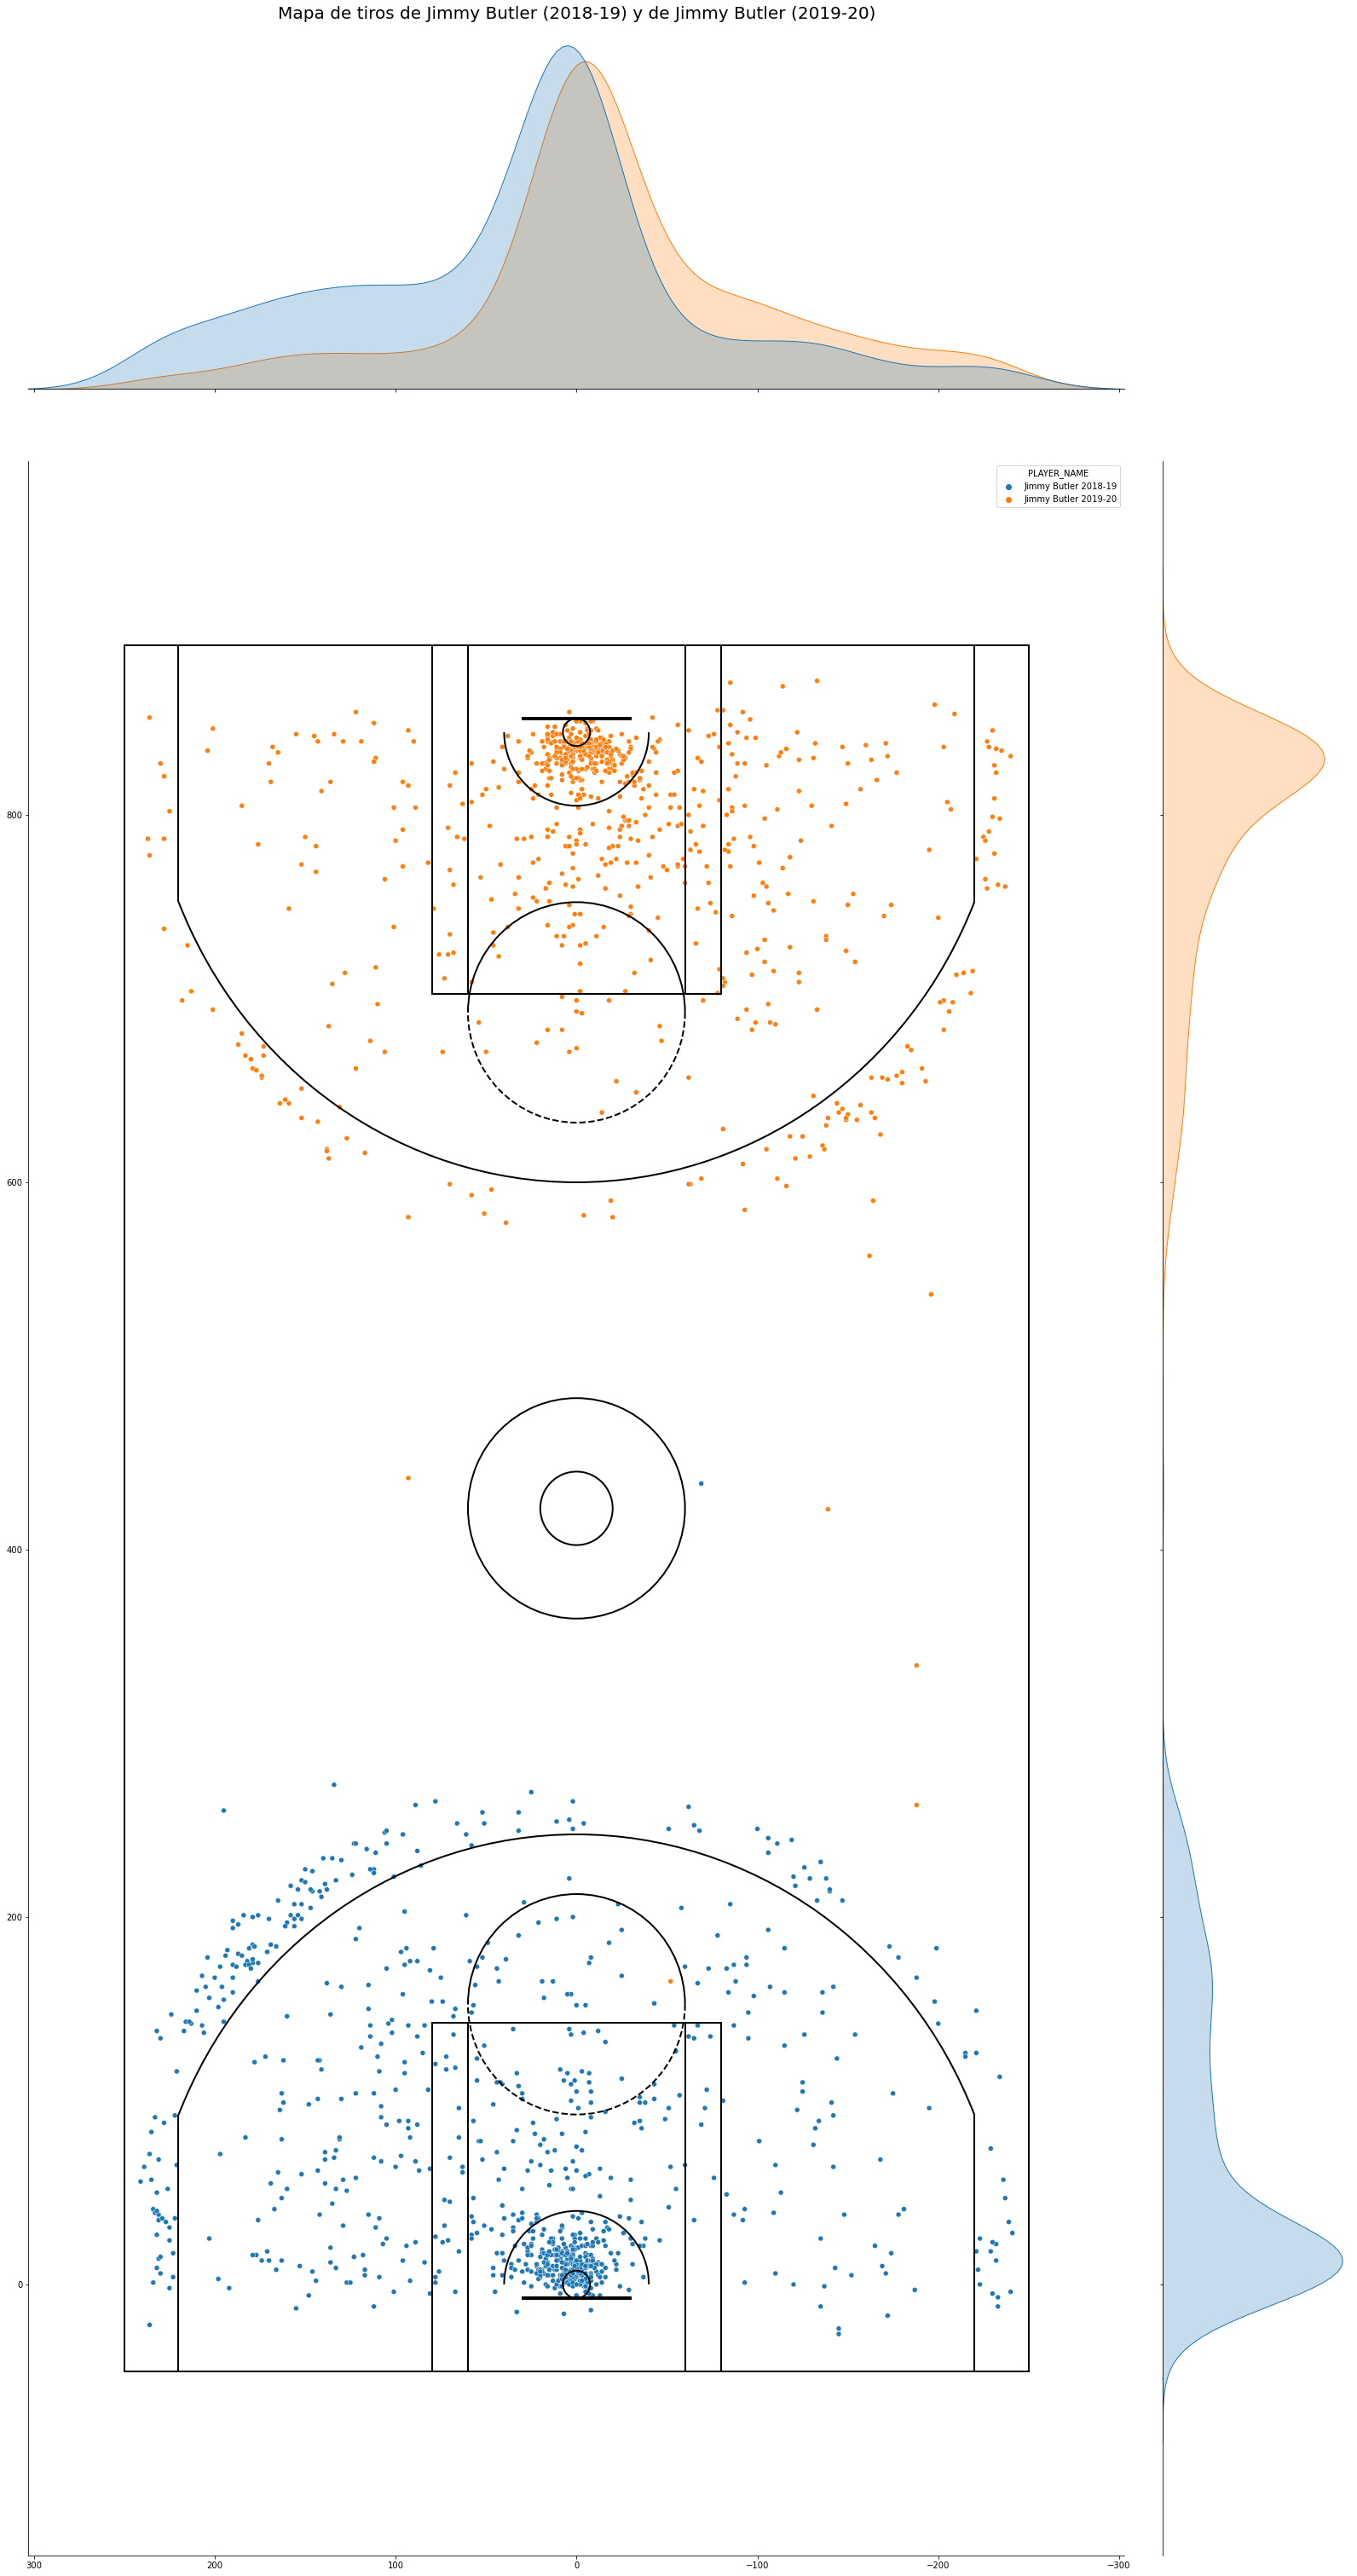

In [22]:
comparar_jugadores_cancha_entera("Jimmy Butler", "2018-19", "Jimmy Butler", "2019-20")

## 4. Comparación de equipos
### 4.1 Media cancha

La siguiente función recibe el nombre del primer equipo y su año y el nombre del segundo equipo y su año.

- equipo1: Tiene que ir entre comillas y no puede quedarse en blanco. Ejemplo: "Chicago Bulls"
- año1: Tiene que ir entre comillas y con el formato XXXX-YY. No puede quedarse en blanco. Ejemplo: "2010-11"
- equipo2: Idéntinco a equipo1.
- año2: Idéntico a año1.

In [23]:
def comparar_equipos(equipo1, año1, equipo2, año2):
    url1 = 'https://stats.nba.com/stats/shotchartdetail?AheadBehind=&CFID=&CFPARAMS=&ClutchTime=&Conference=&ContextFilter=&ContextMeasure=FGA&DateFrom=&DateTo=&Division=&EndPeriod=10&EndRange=28800&GROUP_ID=&GameEventID=&GameID=&GameSegment=&GroupID=&GroupMode=&GroupQuantity=5&LastNGames=0&LeagueID=00&Location=&Month=0&OnOff=&OpponentTeamID=0&Outcome=&PORound=0&Period=0&PlayerID=0&PlayerID1=&PlayerID2=&PlayerID3=&PlayerID4=&PlayerID5=&PlayerPosition=&PointDiff=&Position=&RangeType=0&RookieYear=&Season=' + str(año1) + '&SeasonSegment=&SeasonType=Regular Season&ShotClockRange=&StartPeriod=1&StartRange=0&StarterBench=&TeamID=' + str(int(equipos[equipo1])) + '&VsConference=&VsDivision=&VsPlayerID1=&VsPlayerID2=&VsPlayerID3=&VsPlayerID4=&VsPlayerID5=&VsTeamID='
    datos1 = tabla(url1)
    datos1["SEASON"] = año1
    url2 = 'https://stats.nba.com/stats/shotchartdetail?AheadBehind=&CFID=&CFPARAMS=&ClutchTime=&Conference=&ContextFilter=&ContextMeasure=FGA&DateFrom=&DateTo=&Division=&EndPeriod=10&EndRange=28800&GROUP_ID=&GameEventID=&GameID=&GameSegment=&GroupID=&GroupMode=&GroupQuantity=5&LastNGames=0&LeagueID=00&Location=&Month=0&OnOff=&OpponentTeamID=0&Outcome=&PORound=0&Period=0&PlayerID=0&PlayerID1=&PlayerID2=&PlayerID3=&PlayerID4=&PlayerID5=&PlayerPosition=&PointDiff=&Position=&RangeType=0&RookieYear=&Season=' + str(año2) + '&SeasonSegment=&SeasonType=Regular Season&ShotClockRange=&StartPeriod=1&StartRange=0&StarterBench=&TeamID=' + str(int(equipos[equipo2])) + '&VsConference=&VsDivision=&VsPlayerID1=&VsPlayerID2=&VsPlayerID3=&VsPlayerID4=&VsPlayerID5=&VsTeamID='
    datos2 = tabla(url2)
    datos2["SEASON"] = año2
    datos = pd.concat([datos1, datos2])
    datos["TEAM_NAME"] = datos["TEAM_NAME"] + ' ' + datos["SEASON"]
    joint_shot_chart = sns.jointplot(data=datos, x=datos["LOC_X"], y=datos["LOC_Y"], hue="TEAM_NAME")
    joint_shot_chart.fig.set_size_inches(25,19.9)
    ax = joint_shot_chart.ax_joint
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim([422.5,-47.5])
    ax.set_xlim([250,-250])
    media_cancha(ax)
    if año1 == "" and año2 == "":
        ax.set_title('Todos los tiros de ' + equipo1 + ' y de ' + equipo2 + '\n', y=1.2, fontsize=20)
    elif año1 == "" and año2 != "":
        ax.set_title('Todos los tiros de ' + equipo1 + ' y mapa de tiros de ' + equipo2 + ' (' + año2 + ')\n', y=1.2, fontsize=20)
    elif año1 != "" and año2 == "":
        ax.set_title('Mapa de tiros de ' + equipo1 + ' (' + año1 + ') y todos los tiros de ' + equipo2 + '\n', y=1.2, fontsize=20)
    else:
        ax.set_title('Mapa de tiros de ' + equipo1 + ' (' + año1 + ') y de ' + equipo2 + ' (' + año2 + ')\n', y=1.2, fontsize=20)
    return plt.show()

#### 4.1.1 Ejemplo 1

En el ejemplo comparamos a los Spurs de la temporada 2002-03 con los Warriors de la 2016-17.

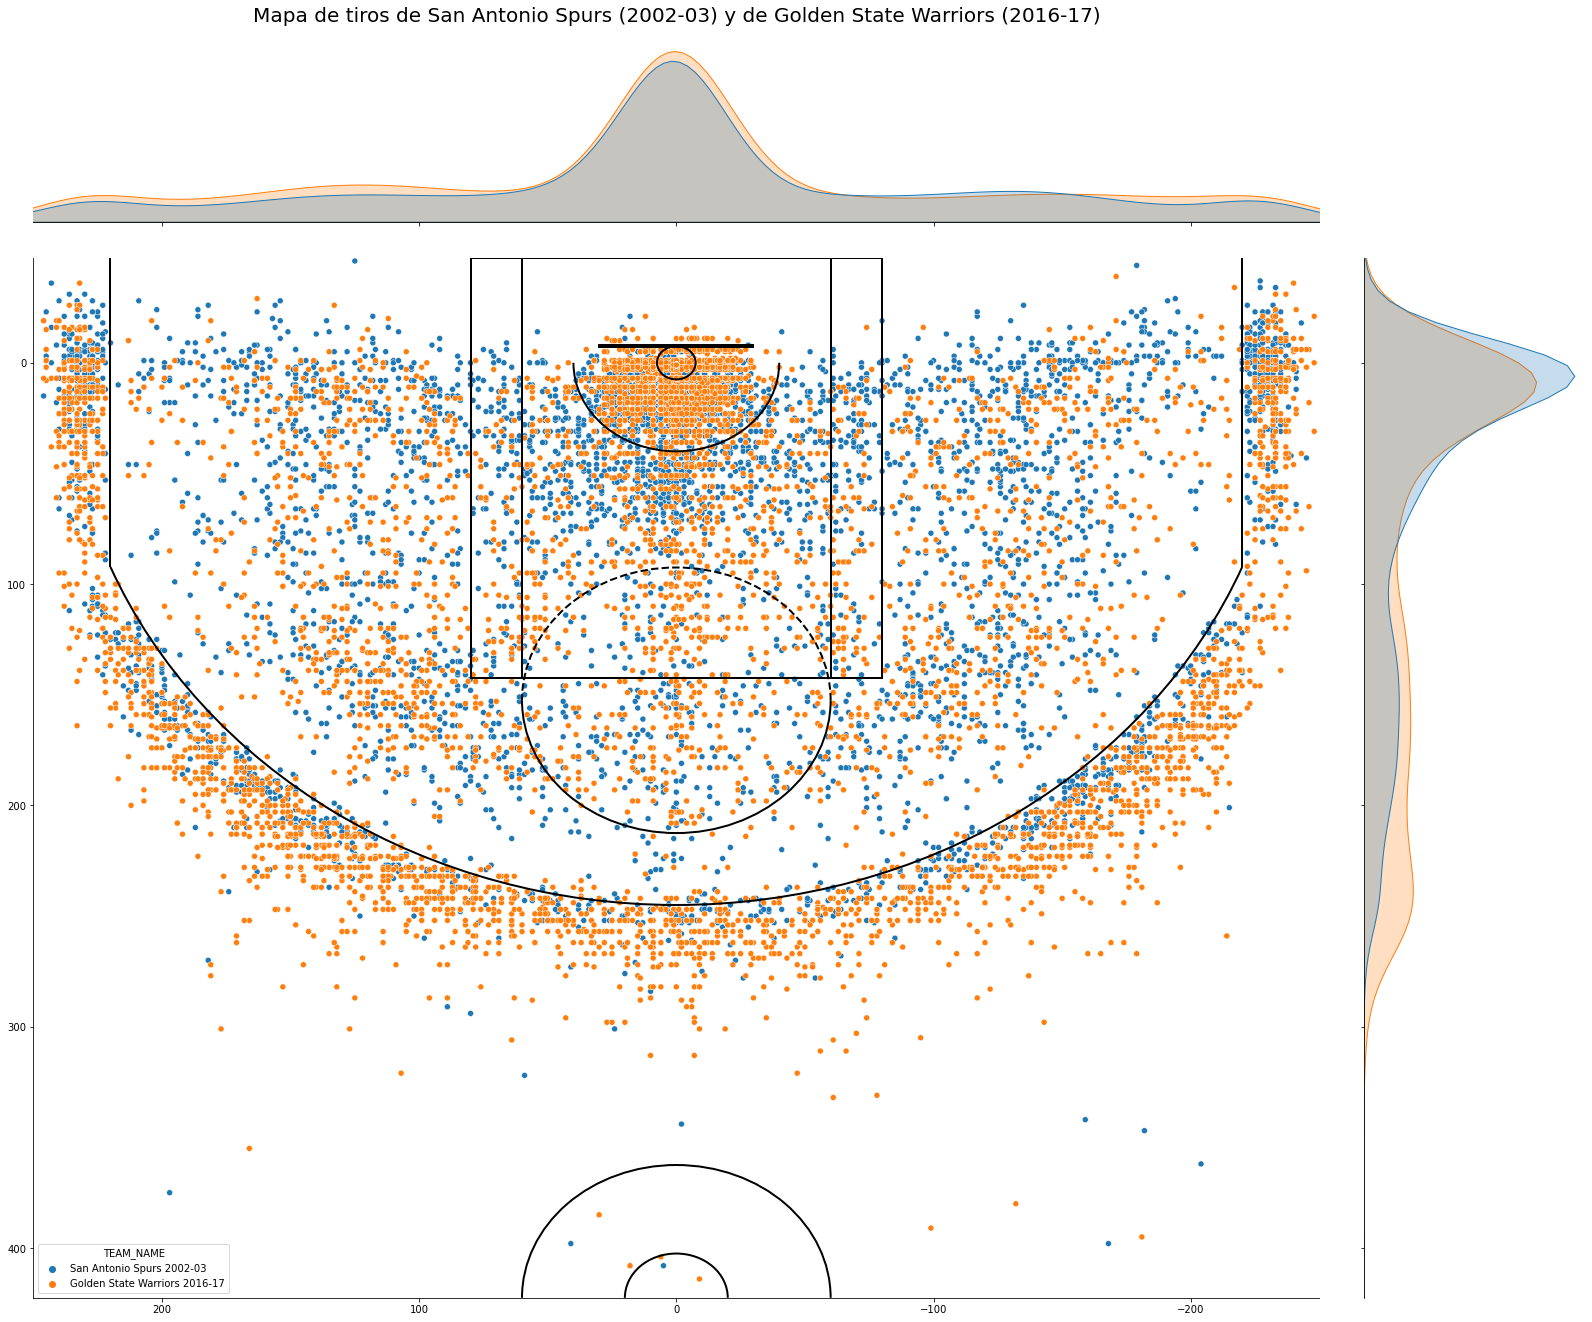

In [24]:
comparar_equipos("San Antonio Spurs", "2002-03", "Golden State Warriors", "2016-17")

### 4.2 Cancha completa

Exactamente igual que la función anterior, pero con los datos mostrados en los dos lados de la pista.

In [25]:
def comparar_equipos_cancha_entera(equipo1, año1, equipo2, año2):
    url1 = 'https://stats.nba.com/stats/shotchartdetail?AheadBehind=&CFID=&CFPARAMS=&ClutchTime=&Conference=&ContextFilter=&ContextMeasure=FGA&DateFrom=&DateTo=&Division=&EndPeriod=10&EndRange=28800&GROUP_ID=&GameEventID=&GameID=&GameSegment=&GroupID=&GroupMode=&GroupQuantity=5&LastNGames=0&LeagueID=00&Location=&Month=0&OnOff=&OpponentTeamID=0&Outcome=&PORound=0&Period=0&PlayerID=0&PlayerID1=&PlayerID2=&PlayerID3=&PlayerID4=&PlayerID5=&PlayerPosition=&PointDiff=&Position=&RangeType=0&RookieYear=&Season=' + str(año1) + '&SeasonSegment=&SeasonType=Regular Season&ShotClockRange=&StartPeriod=1&StartRange=0&StarterBench=&TeamID=' + str(int(equipos[equipo1])) + '&VsConference=&VsDivision=&VsPlayerID1=&VsPlayerID2=&VsPlayerID3=&VsPlayerID4=&VsPlayerID5=&VsTeamID='
    datos1 = tabla(url1)
    datos1["SEASON"] = año1
    url2 = 'https://stats.nba.com/stats/shotchartdetail?AheadBehind=&CFID=&CFPARAMS=&ClutchTime=&Conference=&ContextFilter=&ContextMeasure=FGA&DateFrom=&DateTo=&Division=&EndPeriod=10&EndRange=28800&GROUP_ID=&GameEventID=&GameID=&GameSegment=&GroupID=&GroupMode=&GroupQuantity=5&LastNGames=0&LeagueID=00&Location=&Month=0&OnOff=&OpponentTeamID=0&Outcome=&PORound=0&Period=0&PlayerID=0&PlayerID1=&PlayerID2=&PlayerID3=&PlayerID4=&PlayerID5=&PlayerPosition=&PointDiff=&Position=&RangeType=0&RookieYear=&Season=' + str(año2) + '&SeasonSegment=&SeasonType=Regular Season&ShotClockRange=&StartPeriod=1&StartRange=0&StarterBench=&TeamID=' + str(int(equipos[equipo2])) + '&VsConference=&VsDivision=&VsPlayerID1=&VsPlayerID2=&VsPlayerID3=&VsPlayerID4=&VsPlayerID5=&VsTeamID='
    datos2 = tabla(url2)
    datos2["SEASON"] = año2
    datos2['LOC_X'] = datos2['LOC_X'].apply(lambda x: -x)
    datos2['LOC_Y'] = datos2['LOC_Y'].apply(lambda x: 845-x)
    datos = pd.concat([datos1, datos2])
    datos["TEAM_NAME"] = datos["TEAM_NAME"] + ' ' + datos["SEASON"]
    joint_shot_chart = sns.jointplot(data=datos, x=datos["LOC_X"], y=datos["LOC_Y"], hue="TEAM_NAME")
    joint_shot_chart.fig.set_size_inches(25,47)
    ax = joint_shot_chart.ax_joint
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(-147.5,992.5)
    ax.set_xlim(303,-303)
    cancha_completa(ax)
    ax.set_title('Mapa de tiros de ' + equipo1 + ' (' + año1 + ') y de ' + equipo2 + ' (' + año2 + ')\n', y=1.2, fontsize=20)
    return plt.show()

#### 4.2.1 Ejemplo 1

En el ejemplo comparamos a los Timberwolves con los Kings de la temporada 2020-21

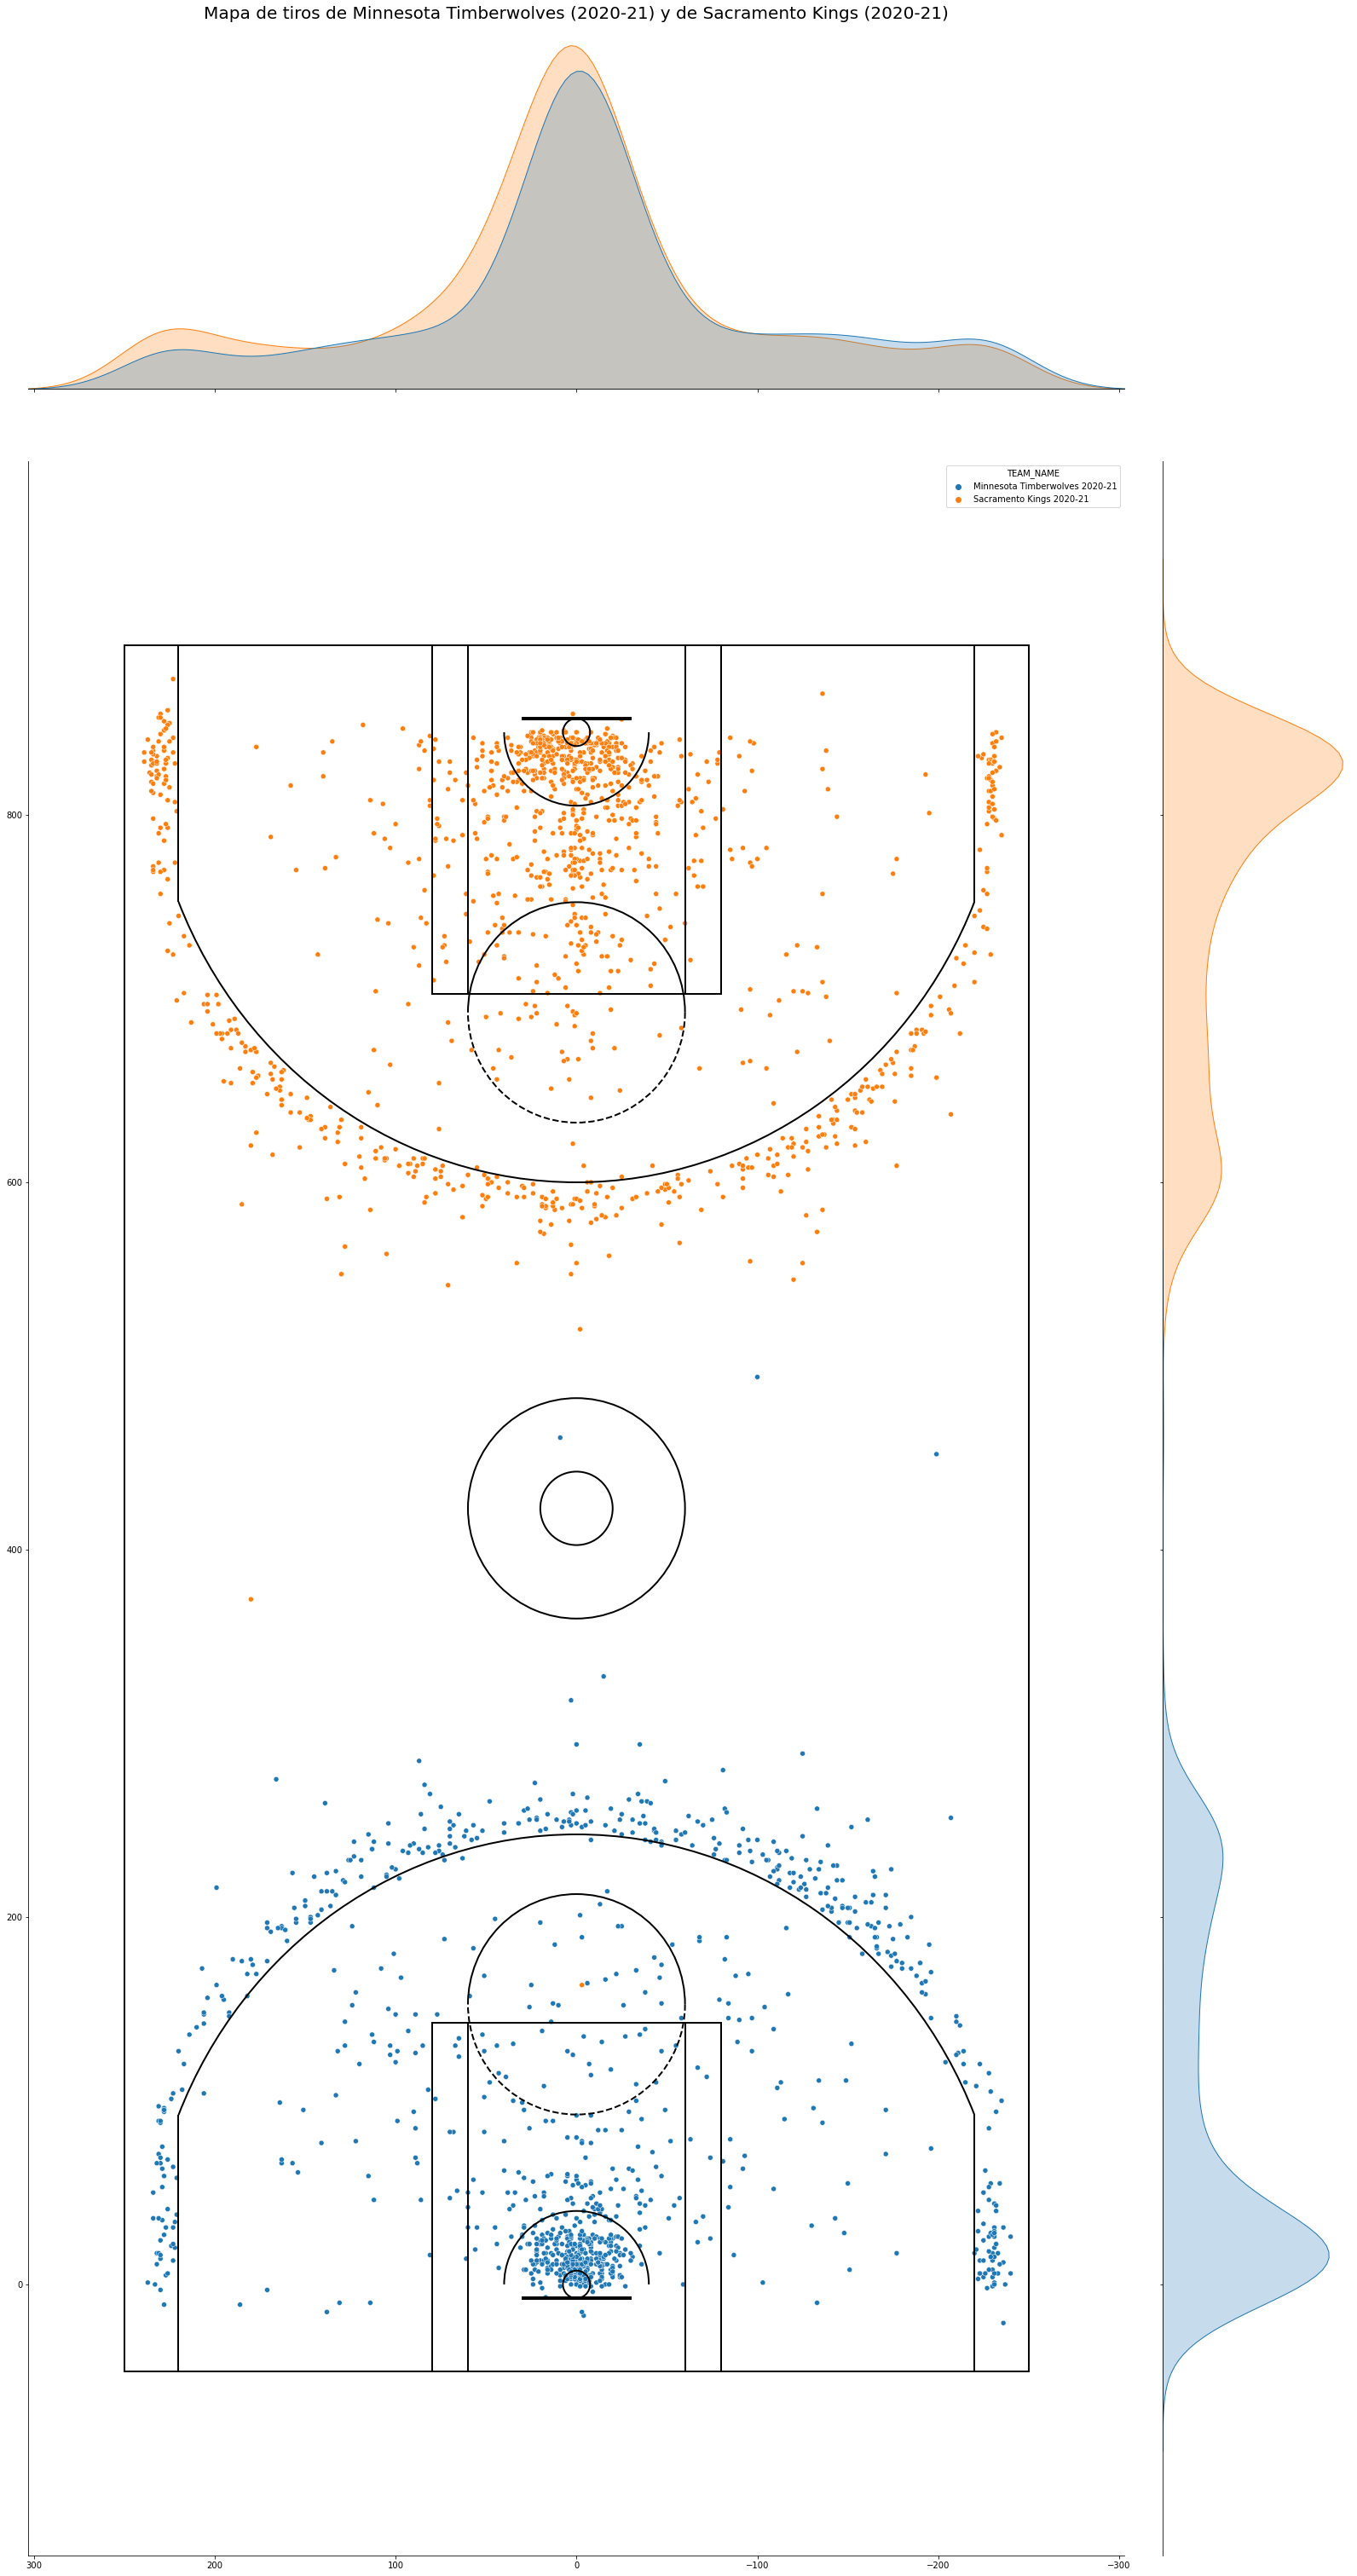

In [26]:
comparar_equipos_cancha_entera("Minnesota Timberwolves", "2020-21", "Sacramento Kings", "2020-21")